# $\sin^2\theta_W$ Analysis

In [2]:
from muon_collider_mc import *
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

from scipy.stats import chi2

from scipy.special import gammaln

def log_pois(data, bkg, signal):
    return -2*np.sum(data * np.log(signal + bkg) - (signal + bkg) - gammaln(data + 1))

Import the fluxes

In [3]:
# Load the precalculated fluxes
numu_flux_500GeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-500GeV_1e19nu.txt")
nue_flux_500GeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-500GeV_1e19nu.txt")

numu_flux_3TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-3TeV_1e19nu.txt")
nue_flux_3TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-3TeV_1e19nu.txt")

numu_flux_10TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-10TeV_1e19nu.txt")
nue_flux_10TeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-10TeV_1e19nu.txt")

# renormalize to 2e18
numu_flux_500GeV[:,1] *= 1/5
nue_flux_500GeV[:,1] *= 1/5
numu_flux_3TeV[:,1] *= 1/5
nue_flux_3TeV[:,1] *= 1/5
numu_flux_10TeV[:,1] *= 1/5
nue_flux_10TeV[:,1] *= 1/5

from flux_config import *

# Testing Sensitivity to the Running


### Set ```ssw_running=True``` in the below initializations

In [4]:
N_SAMPLES = 500


# sqrt(s) = 10 TeV - WITH RUNNING
eves_gen_nuebar_10TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_numu_10TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_nuebar_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV_running, _, _, nuebar_wgts_10TeV_running = eves_gen_nuebar_10TeV_running.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV_running, _, _, numu_wgts_10TeV_running = eves_gen_numu_10TeV_running.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_10TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_numubar_10TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_nue_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_10TeV_running, _, _, nue_wgts_10TeV_running = eves_gen_nue_10TeV_running.get_energy_theta_phi_wgt_arrays()
numubar_energies_10TeV_running, _, _, numubar_wgts_10TeV_running = eves_gen_numubar_10TeV_running.get_energy_theta_phi_wgt_arrays()

# sqrt(s) = 3 TeV - WITH RUNNING
eves_gen_nuebar_3TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_numu_3TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_nuebar_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_3TeV_running, _, _, nuebar_wgts_3TeV_running = eves_gen_nuebar_3TeV_running.get_energy_theta_phi_wgt_arrays()
numu_energies_3TeV_running, _, _, numu_wgts_3TeV_running = eves_gen_numu_3TeV_running.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_3TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_numubar_3TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_nue_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_3TeV_running, _, _, nue_wgts_3TeV_running = eves_gen_nue_3TeV_running.get_energy_theta_phi_wgt_arrays()
numubar_energies_3TeV_running, _, _, numubar_wgts_3TeV_running = eves_gen_numubar_3TeV_running.get_energy_theta_phi_wgt_arrays()


# sqrt(s) = 500 GeV - WITH RUNNING
eves_gen_nuebar_500GeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_500GeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_numu_500GeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_500GeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_nuebar_500GeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_500GeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_500GeV_running, _, _, nuebar_wgts_500GeV_running = eves_gen_nuebar_500GeV_running.get_energy_theta_phi_wgt_arrays()
numu_energies_500GeV_running, _, _, numu_wgts_500GeV_running = eves_gen_numu_500GeV_running.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_500GeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_500GeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_numubar_500GeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_500GeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_nue_500GeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_500GeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_500GeV_running, _, _, nue_wgts_500GeV_running = eves_gen_nue_500GeV_running.get_energy_theta_phi_wgt_arrays()
numubar_energies_500GeV_running, _, _, numubar_wgts_500GeV_running = eves_gen_numubar_500GeV_running.get_energy_theta_phi_wgt_arrays()



# sqrt(s) = 10 TeV WITHOUT RUNNING
eves_gen_nuebar_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=20.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW_MUM'],
                                    ssw_running=False, energy_only_flux=True)
eves_gen_numu_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=20.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW_MUM'],
                                    ssw_running=False, energy_only_flux=True)
eves_gen_nuebar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV, _, _, nuebar_wgts_10TeV = eves_gen_nuebar_10TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV, _, _, numu_wgts_10TeV = eves_gen_numu_10TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=20.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW_MUP'],
                                    ssw_running=False, energy_only_flux=True)
eves_gen_numubar_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=20.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW_MUP'],
                                    ssw_running=False, energy_only_flux=True)
eves_gen_nue_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_10TeV, _, _, nue_wgts_10TeV = eves_gen_nue_10TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_10TeV, _, _, numubar_wgts_10TeV = eves_gen_numubar_10TeV.get_energy_theta_phi_wgt_arrays()


C:\Users\adria\AppData\Local\Temp\ipykernel_28540\1340146257.py:65: RuntimeWarning: invalid value encountered in divide
  ax2.hist(q_bin_centers, weights=np.nan_to_num((h_nuebar-h_nuebar_run)/np.sqrt(h_nuebar)), bins=q_bins,
C:\Users\adria\AppData\Local\Temp\ipykernel_28540\1340146257.py:67: RuntimeWarning: invalid value encountered in divide
  ax2.hist(q_bin_centers, weights=np.nan_to_num((h_numu-h_numu_run)/np.sqrt(h_numu)), bins=q_bins,
C:\Users\adria\AppData\Local\Temp\ipykernel_28540\1340146257.py:69: RuntimeWarning: invalid value encountered in divide
  ax2.hist(q_bin_centers, weights=np.nan_to_num((h_nue-h_nue_run)/np.sqrt(h_nue)), bins=q_bins,
C:\Users\adria\AppData\Local\Temp\ipykernel_28540\1340146257.py:71: RuntimeWarning: invalid value encountered in divide
  ax2.hist(q_bin_centers, weights=np.nan_to_num((h_numubar-h_numubar_run)/np.sqrt(h_numubar)), bins=q_bins,


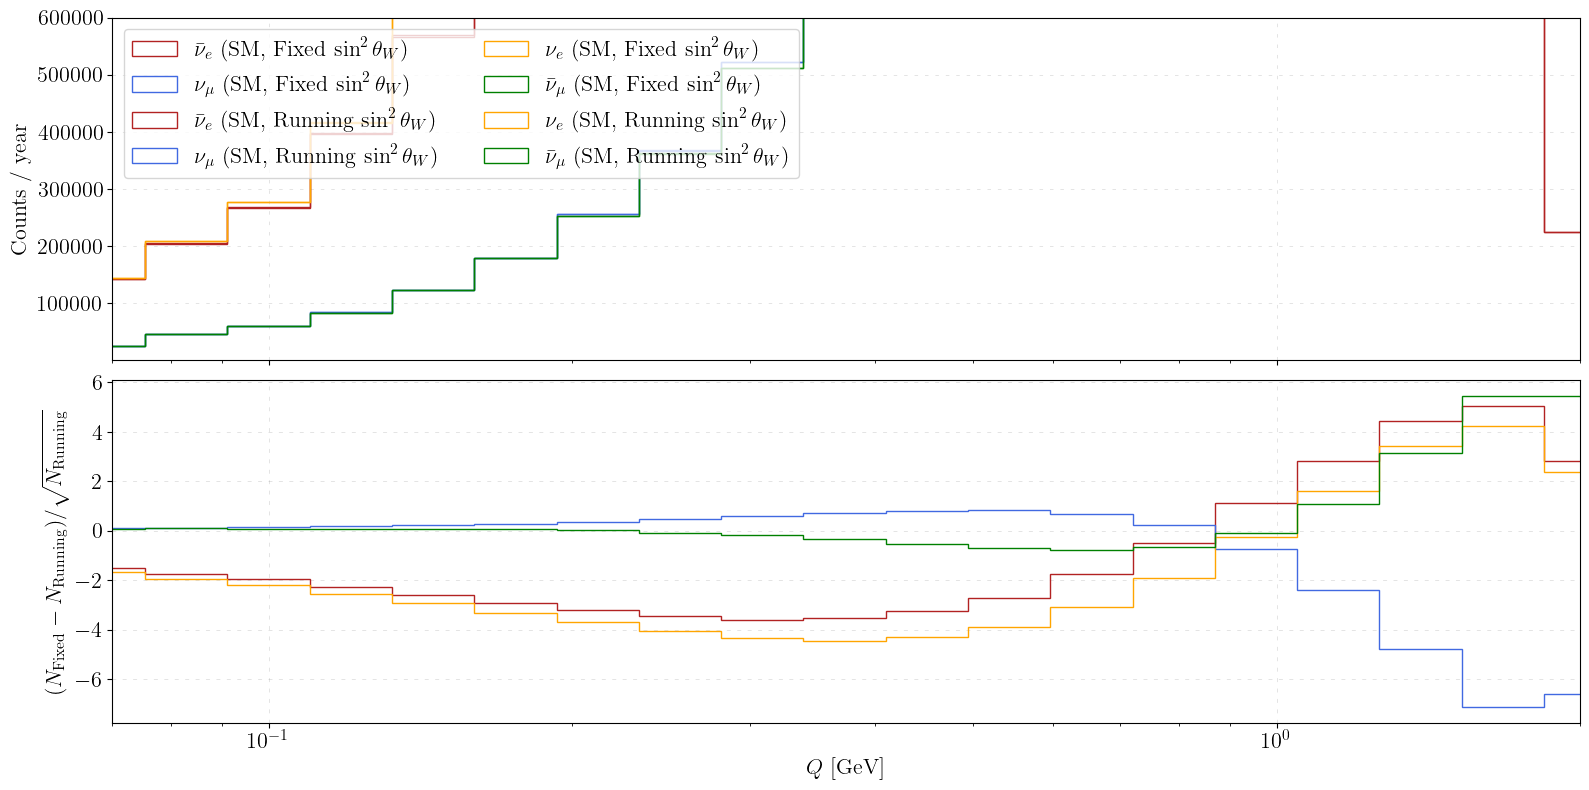

In [5]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
SSW_AT_1GEV = 0.23638198757763973


mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

# Create the figure and set up the grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

q_bins = np.logspace(-3, 1, 50)
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2

# Top panel: Recoil energy spectrum plot

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Fixed $\sin^2 \theta_W$)", color='firebrick')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='royalblue')

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Running $\sin^2 \theta_W$)", color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Running $\sin^2 \theta_W$)", color='royalblue', ls='dashed')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Fixed $\sin^2 \theta_W$)", color='orange')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='g')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Running $\sin^2 \theta_W$)", color='orange', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Running $\sin^2 \theta_W$)", color='g', ls='dashed')

#ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos")
ax1.legend(loc="upper left", ncol=2, fontsize=16)

ax1.set_ylabel("Counts / year", fontsize=16)
ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_ylim((0.1, 0.6e6))
#ax1.set_yscale('log')

################################################################################################

# Bottom panel: subtraction

# Collect all diffs
h_nuebar, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins)
h_nue, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins)
h_numubar, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins)
h_numu, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins)

h_nuebar_run, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins)
h_nue_run, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins)
h_numubar_run, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins)
h_numu_run, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins)


ax2.hist(q_bin_centers, weights=np.nan_to_num((h_nuebar-h_nuebar_run)/np.sqrt(h_nuebar)), bins=q_bins,
         histtype='step', color='firebrick', linewidth=1.0)
ax2.hist(q_bin_centers, weights=np.nan_to_num((h_numu-h_numu_run)/np.sqrt(h_numu)), bins=q_bins,
         histtype='step', color='royalblue', linewidth=1.0)
ax2.hist(q_bin_centers, weights=np.nan_to_num((h_nue-h_nue_run)/np.sqrt(h_nue)), bins=q_bins,
         histtype='step', color='orange', linewidth=1.0)
ax2.hist(q_bin_centers, weights=np.nan_to_num((h_numubar-h_numubar_run)/np.sqrt(h_numubar)), bins=q_bins,
         histtype='step', color='g', linewidth=1.0)



ax2.set_xscale('log')
ax2.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax2.set_ylabel(r"$(N_{\rm Fixed} - N_{\rm Running}) / \sqrt{N_{\rm Running}}$", fontsize=16)
#ax2.set_ylim(top=0.242)
ax2.set_xlim((7e-2, 2))

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Final adjustments and save
plt.tight_layout()
plt.savefig("plots/weak_mixing/EvES_spectra_vs_SSW_Running_10TeV.pdf")
plt.show()

# Constraining SSW over regions and extracting fixed vals

#### 10 TeV regions

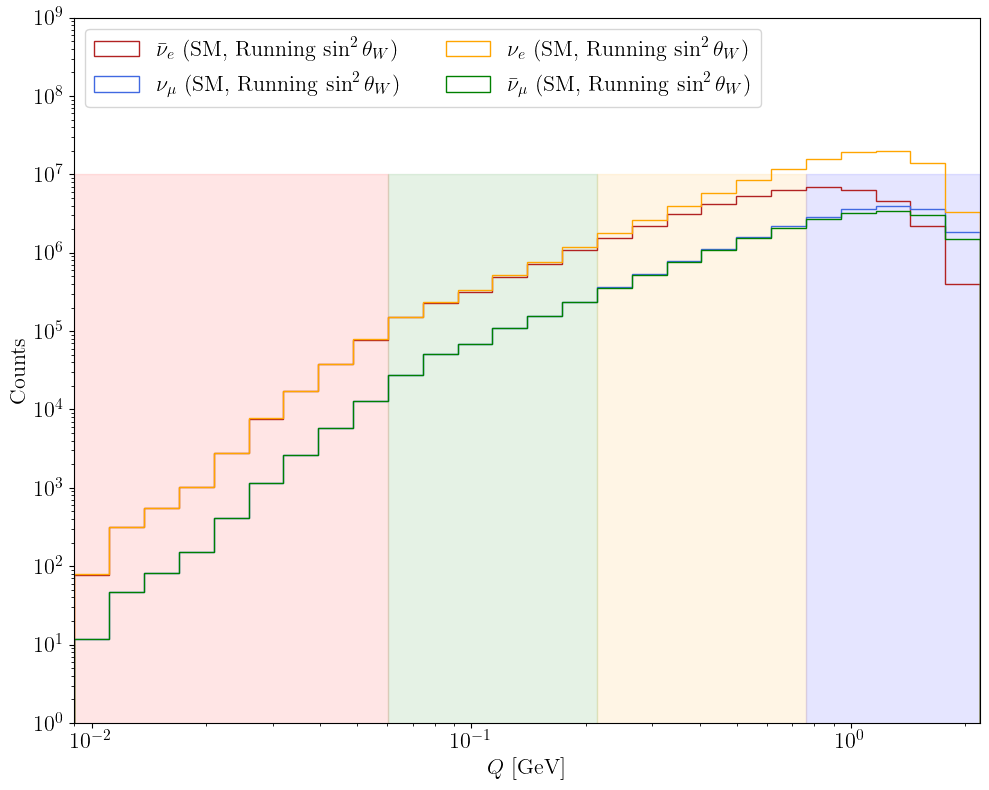

In [6]:
# Create the figure and set up the grid
fig, ax1 = plt.subplots(figsize=(10, 8))

q_bins = fluxes_dict["10TeV"]["q_bins_GeV"]
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Running $\sin^2 \theta_W$)", color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Running $\sin^2 \theta_W$)", color='royalblue', ls='dashed')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Running $\sin^2 \theta_W$)", color='orange', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Running $\sin^2 \theta_W$)", color='g', ls='dashed')


# regions
q_regions = [q_bins[0], q_bins[9], q_bins[15], q_bins[21], q_bins[-1]]
ax1.fill_betweenx([0.0, 1e7], q_regions[0], q_regions[1], color='r', alpha=0.1)
ax1.fill_betweenx([0.0, 1e7], q_regions[1], q_regions[2], color='g', alpha=0.1)
ax1.fill_betweenx([0.0, 1e7], q_regions[2], q_regions[3], color='orange', alpha=0.1)
ax1.fill_betweenx([0.0, 1e7], q_regions[3], q_regions[4], color='b', alpha=0.1)


#ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos")
ax1.legend(loc="upper left", ncol=2, fontsize=16)

ax1.set_ylabel("Counts", fontsize=16)
ax1.set_xlabel(r"$Q$ [GeV]", fontsize=16)

ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylim((1, 1e9))
ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)

# Final adjustments and save
plt.tight_layout()
plt.show()

#### 3 TeV regions

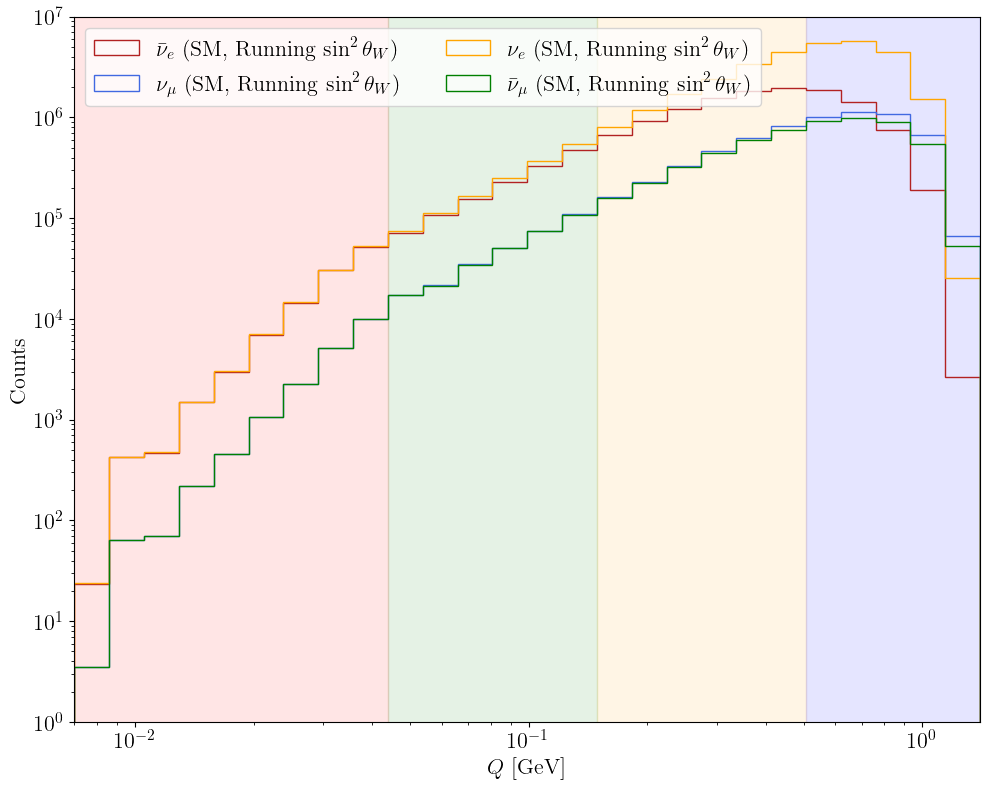

In [7]:
# Create the figure and set up the grid
fig, ax1 = plt.subplots(figsize=(10, 8))

q_bins = fluxes_dict["3TeV"]["q_bins_GeV"]
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_3TeV_running), weights=nuebar_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Running $\sin^2 \theta_W$)", color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_3TeV_running), weights=numu_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Running $\sin^2 \theta_W$)", color='royalblue', ls='dashed')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_3TeV_running), weights=nue_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Running $\sin^2 \theta_W$)", color='orange', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_3TeV_running), weights=numubar_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Running $\sin^2 \theta_W$)", color='g', ls='dashed')


# regions
q_regions = [q_bins[0], q_bins[9], q_bins[15], q_bins[21], q_bins[-1]]
ax1.fill_betweenx([0.0, 1e7], q_regions[0], q_regions[1], color='r', alpha=0.1)
ax1.fill_betweenx([0.0, 1e7], q_regions[1], q_regions[2], color='g', alpha=0.1)
ax1.fill_betweenx([0.0, 1e7], q_regions[2], q_regions[3], color='orange', alpha=0.1)
ax1.fill_betweenx([0.0, 1e7], q_regions[3], q_regions[4], color='b', alpha=0.1)


#ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos")
ax1.legend(loc="upper left", ncol=2, fontsize=16)

ax1.set_ylabel("Counts", fontsize=16)
ax1.set_xlabel(r"$Q$ [GeV]", fontsize=16)

ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylim((1, 1e7))
ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)

# Final adjustments and save
plt.tight_layout()
plt.show()

#### 500 GeV regions

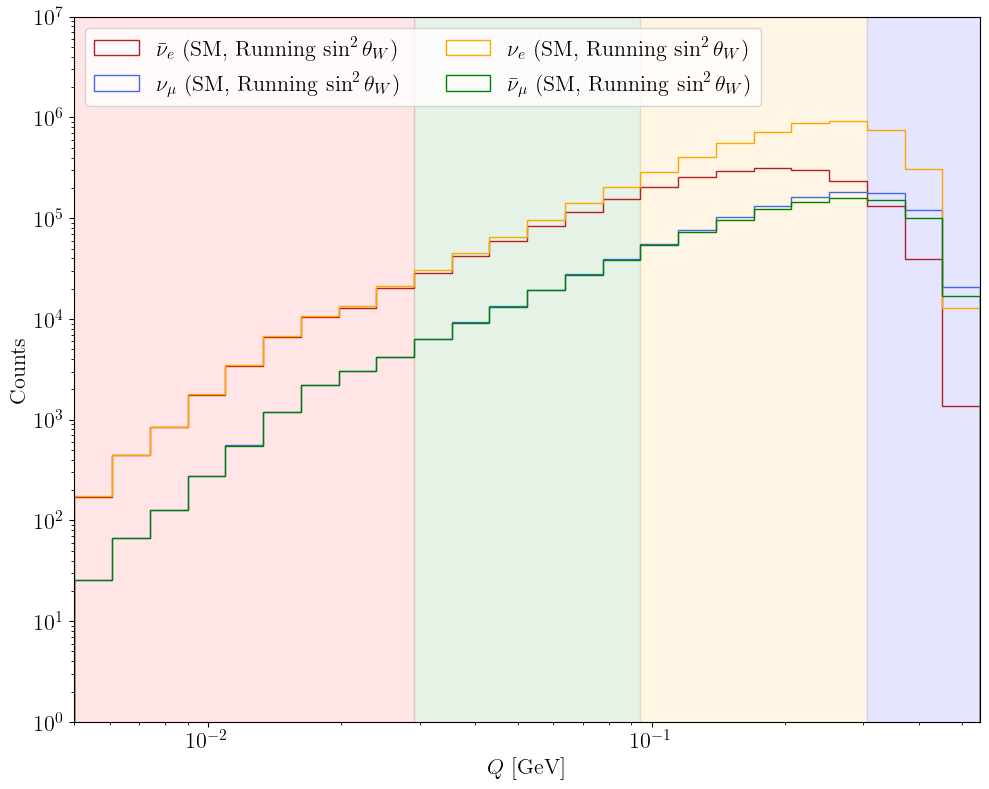

In [8]:
# Create the figure and set up the grid
fig, ax1 = plt.subplots(figsize=(10, 8))

q_bins = fluxes_dict["500GeV"]["q_bins_GeV"]
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_500GeV_running), weights=nuebar_wgts_500GeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Running $\sin^2 \theta_W$)", color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_500GeV_running), weights=numu_wgts_500GeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Running $\sin^2 \theta_W$)", color='royalblue', ls='dashed')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_500GeV_running), weights=nue_wgts_500GeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Running $\sin^2 \theta_W$)", color='orange', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_500GeV_running), weights=numubar_wgts_500GeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Running $\sin^2 \theta_W$)", color='g', ls='dashed')


# regions
q_regions = [q_bins[0], q_bins[9], q_bins[15], q_bins[21], q_bins[-1]]
ax1.fill_betweenx([0.0, 1e7], q_regions[0], q_regions[1], color='r', alpha=0.1)
ax1.fill_betweenx([0.0, 1e7], q_regions[1], q_regions[2], color='g', alpha=0.1)
ax1.fill_betweenx([0.0, 1e7], q_regions[2], q_regions[3], color='orange', alpha=0.1)
ax1.fill_betweenx([0.0, 1e7], q_regions[3], q_regions[4], color='b', alpha=0.1)


#ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos")
ax1.legend(loc="upper left", ncol=2, fontsize=16)

ax1.set_ylabel("Counts", fontsize=16)
ax1.set_xlabel(r"$Q$ [GeV]", fontsize=16)

ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylim((1, 1e7))
ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)

# Final adjustments and save
plt.tight_layout()
plt.show()

### Scan for 10 TeV

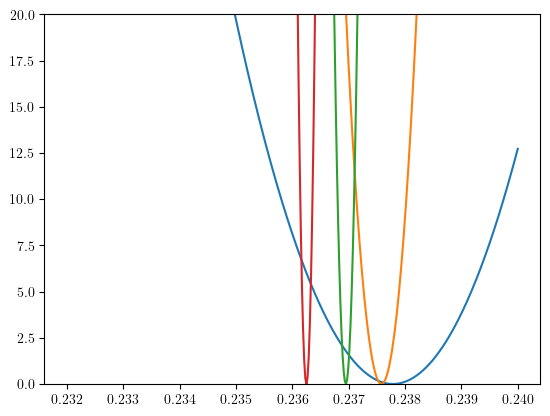

In [9]:
q_bins = fluxes_dict["10TeV"]["q_bins_GeV"]
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2
q_regions = [q_bins[0], q_bins[9], q_bins[15], q_bins[21], q_bins[-1]]


h_nuebar_null, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins)
h_nue_null, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins)
h_numubar_null, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins)
h_numu_null, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins)

# totals
total_mup_null_h = h_nue_null + h_numubar_null
total_mum_null_h = h_nuebar_null + h_numu_null

mum_null_h_I = total_mum_null_h[0:9]
mum_null_h_II = total_mum_null_h[9:15]
mum_null_h_III = total_mum_null_h[15:21]
mum_null_h_IV = total_mum_null_h[21:-1]

mup_null_h_I = total_mup_null_h[0:9]
mup_null_h_II = total_mup_null_h[9:15]
mup_null_h_III = total_mup_null_h[15:21]
mup_null_h_IV = total_mup_null_h[21:-1]

# Get null hyps for each region
def get_4spectrum_energies_wgts(sw2=fluxes_dict['10TeV']['SSW_MUP']):
    eves_gen_nuebar_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_numu_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_nuebar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    eves_gen_numu_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    nuebar_energies_10TeV, _, _, nuebar_wgts_10TeV = eves_gen_nuebar_10TeV.get_energy_theta_phi_wgt_arrays()
    numu_energies_10TeV, _, _, numu_wgts_10TeV = eves_gen_numu_10TeV.get_energy_theta_phi_wgt_arrays()

    eves_gen_nue_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_numubar_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_nue_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    eves_gen_numubar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    nue_energies_10TeV, _, _, nue_wgts_10TeV = eves_gen_nue_10TeV.get_energy_theta_phi_wgt_arrays()
    numubar_energies_10TeV, _, _, numubar_wgts_10TeV = eves_gen_numubar_10TeV.get_energy_theta_phi_wgt_arrays()

    h_nuebar, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins)
    h_nue, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins)
    h_numubar, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins)
    h_numu, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins)

    return h_nuebar, h_nue, h_numubar, h_numu


# Run the SSW scan, collect all 4 chi^2 for each region
ssw_vals = np.linspace(0.232, 0.240, 400)
chi2_I_list = []
chi2_II_list = []
chi2_III_list = []
chi2_IV_list = []

for this_ssw in ssw_vals:
    h_nuebar, h_nue, h_numubar, h_numu = get_4spectrum_energies_wgts(this_ssw)

    # break up into regions
    total_mup_test_h = h_nue + h_numubar
    total_mum_test_h = h_nuebar + h_numu

    mum_test_h_I = total_mum_test_h[0:9]
    mum_test_h_II = total_mum_test_h[9:15]
    mum_test_h_III = total_mum_test_h[15:21]
    mum_test_h_IV = total_mum_test_h[21:-1]

    mup_test_h_I = total_mup_test_h[0:9]
    mup_test_h_II = total_mup_test_h[9:15]
    mup_test_h_III = total_mup_test_h[15:21]
    mup_test_h_IV = total_mup_test_h[21:-1]

    chi2_I = np.sum(power(mum_test_h_I - mum_null_h_I, 2)/mum_null_h_I) + np.sum(power(mup_test_h_I - mup_null_h_I, 2)/mup_null_h_I)
    chi2_II = np.sum(power(mum_test_h_II - mum_null_h_II, 2)/mum_null_h_II) + np.sum(power(mup_test_h_II - mup_null_h_II, 2)/mup_null_h_II)
    chi2_III = np.sum(power(mum_test_h_III - mum_null_h_III, 2)/mum_null_h_III) + np.sum(power(mup_test_h_III - mup_null_h_III, 2)/mup_null_h_III)
    chi2_IV = np.sum(power(mum_test_h_IV - mum_null_h_IV, 2)/mum_null_h_IV) + np.sum(power(mup_test_h_IV - mup_null_h_IV, 2)/mup_null_h_IV)

    chi2_I_list.append(chi2_I)
    chi2_II_list.append(chi2_II)
    chi2_III_list.append(chi2_III)
    chi2_IV_list.append(chi2_IV)



plt.plot(ssw_vals, chi2_I_list - min(chi2_I_list), label="I")
plt.plot(ssw_vals, chi2_II_list - min(chi2_II_list), label="II")
plt.plot(ssw_vals, chi2_III_list - min(chi2_III_list), label="III")
plt.plot(ssw_vals, chi2_IV_list - min(chi2_IV_list), label="IV")
plt.ylim((0.0, 20))
plt.show()


Get the CLs

In [10]:
alphaI_idx = (chi2_I_list - min(chi2_I_list)) <= 1.0  # 1 sigma
alphaI_vals = [ssw_vals[alphaI_idx][0], ssw_vals[alphaI_idx][-1]]
bfI = ssw_vals[np.argmin(chi2_I_list)]

alphaII_idx = (chi2_II_list - min(chi2_II_list)) <= 1.0  # 1 sigma
alphaII_vals = [ssw_vals[alphaII_idx][0], ssw_vals[alphaII_idx][-1]]
bfII = ssw_vals[np.argmin(chi2_II_list)]

alphaIII_idx = (chi2_III_list - min(chi2_III_list)) <= 1.0  # 1 sigma
alphaIII_vals = [ssw_vals[alphaIII_idx][0], ssw_vals[alphaIII_idx][-1]]
bfIII = ssw_vals[np.argmin(chi2_III_list)]

alphaIV_idx = (chi2_IV_list - min(chi2_IV_list)) <= 1.0  # 1 sigma
alphaIV_vals = [ssw_vals[alphaIV_idx][0], ssw_vals[alphaIV_idx][-1]]
bfIV = ssw_vals[np.argmin(chi2_IV_list)]



### Scan for 3 TeV

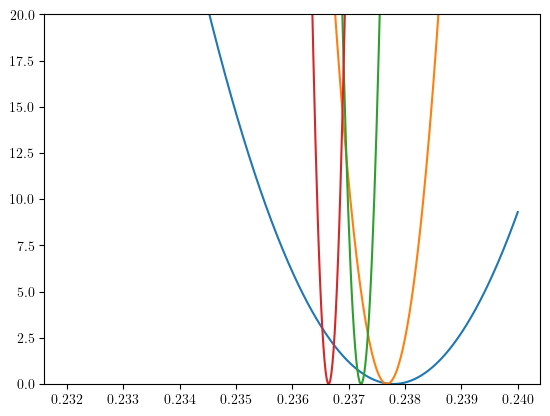

In [11]:
q_bins = fluxes_dict["3TeV"]["q_bins_GeV"]
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2
q_regions = [q_bins[0], q_bins[9], q_bins[15], q_bins[21], q_bins[-1]]


h_nuebar_null, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_3TeV_running), weights=nuebar_wgts_3TeV_running, bins=q_bins)
h_nue_null, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_3TeV_running), weights=nue_wgts_3TeV_running, bins=q_bins)
h_numubar_null, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_3TeV_running), weights=numubar_wgts_3TeV_running, bins=q_bins)
h_numu_null, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_3TeV_running), weights=numu_wgts_3TeV_running, bins=q_bins)

# totals
total_mup_null_h = h_nue_null + h_numubar_null
total_mum_null_h = h_nuebar_null + h_numu_null

mum_null_h_I = total_mum_null_h[0:9]
mum_null_h_II = total_mum_null_h[9:15]
mum_null_h_III = total_mum_null_h[15:21]
mum_null_h_IV = total_mum_null_h[21:-1]

mup_null_h_I = total_mup_null_h[0:9]
mup_null_h_II = total_mup_null_h[9:15]
mup_null_h_III = total_mup_null_h[15:21]
mup_null_h_IV = total_mup_null_h[21:-1]

# Get null hyps for each region
def get_4spectrum_energies_wgts(sw2=fluxes_dict['3TeV']['SSW_MUP']):
    eves_gen_nuebar_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="ebar", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_numu_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mu", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_nuebar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    eves_gen_numu_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    nuebar_energies_3TeV, _, _, nuebar_wgts_3TeV = eves_gen_nuebar_3TeV.get_energy_theta_phi_wgt_arrays()
    numu_energies_3TeV, _, _, numu_wgts_3TeV = eves_gen_numu_3TeV.get_energy_theta_phi_wgt_arrays()

    eves_gen_nue_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="e", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_numubar_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mubar", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_nue_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    eves_gen_numubar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    nue_energies_3TeV, _, _, nue_wgts_3TeV = eves_gen_nue_3TeV.get_energy_theta_phi_wgt_arrays()
    numubar_energies_3TeV, _, _, numubar_wgts_3TeV = eves_gen_numubar_3TeV.get_energy_theta_phi_wgt_arrays()

    h_nuebar, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_3TeV), weights=nuebar_wgts_3TeV, bins=q_bins)
    h_nue, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_3TeV), weights=nue_wgts_3TeV, bins=q_bins)
    h_numubar, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_3TeV), weights=numubar_wgts_3TeV, bins=q_bins)
    h_numu, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_3TeV), weights=numu_wgts_3TeV, bins=q_bins)

    return h_nuebar, h_nue, h_numubar, h_numu


# Run the SSW scan, collect all 4 chi^2 for each region
ssw_vals = np.linspace(0.232, 0.240, 400)
chi2_I_list = []
chi2_II_list = []
chi2_III_list = []
chi2_IV_list = []

for this_ssw in ssw_vals:
    h_nuebar, h_nue, h_numubar, h_numu = get_4spectrum_energies_wgts(this_ssw)

    # break up into regions
    total_mup_test_h = h_nue + h_numubar
    total_mum_test_h = h_nuebar + h_numu

    mum_test_h_I = total_mum_test_h[0:9]
    mum_test_h_II = total_mum_test_h[9:15]
    mum_test_h_III = total_mum_test_h[15:21]
    mum_test_h_IV = total_mum_test_h[21:-1]

    mup_test_h_I = total_mup_test_h[0:9]
    mup_test_h_II = total_mup_test_h[9:15]
    mup_test_h_III = total_mup_test_h[15:21]
    mup_test_h_IV = total_mup_test_h[21:-1]

    chi2_I = np.sum(power(mum_test_h_I - mum_null_h_I, 2)/mum_null_h_I) + np.sum(power(mup_test_h_I - mup_null_h_I, 2)/mup_null_h_I)
    chi2_II = np.sum(power(mum_test_h_II - mum_null_h_II, 2)/mum_null_h_II) + np.sum(power(mup_test_h_II - mup_null_h_II, 2)/mup_null_h_II)
    chi2_III = np.sum(power(mum_test_h_III - mum_null_h_III, 2)/mum_null_h_III) + np.sum(power(mup_test_h_III - mup_null_h_III, 2)/mup_null_h_III)
    chi2_IV = np.sum(power(mum_test_h_IV - mum_null_h_IV, 2)/mum_null_h_IV) + np.sum(power(mup_test_h_IV - mup_null_h_IV, 2)/mup_null_h_IV)

    chi2_I_list.append(chi2_I)
    chi2_II_list.append(chi2_II)
    chi2_III_list.append(chi2_III)
    chi2_IV_list.append(chi2_IV)



plt.plot(ssw_vals, chi2_I_list - min(chi2_I_list), label="I")
plt.plot(ssw_vals, chi2_II_list - min(chi2_II_list), label="II")
plt.plot(ssw_vals, chi2_III_list - min(chi2_III_list), label="III")
plt.plot(ssw_vals, chi2_IV_list - min(chi2_IV_list), label="IV")
plt.ylim((0.0, 20))
plt.show()


alphaI_idx_3TeV = (chi2_I_list - min(chi2_I_list)) <= 1.0  # 1 sigma
alphaI_vals_3TeV = [ssw_vals[alphaI_idx_3TeV][0], ssw_vals[alphaI_idx_3TeV][-1]]
bfI_3TeV = ssw_vals[np.argmin(chi2_I_list)]

alphaII_idx_3TeV = (chi2_II_list - min(chi2_II_list)) <= 1.0  # 1 sigma
alphaII_vals_3TeV = [ssw_vals[alphaII_idx_3TeV][0], ssw_vals[alphaII_idx_3TeV][-1]]
bfII_3TeV = ssw_vals[np.argmin(chi2_II_list)]

alphaIII_idx_3TeV = (chi2_III_list - min(chi2_III_list)) <= 1.0  # 1 sigma
alphaIII_vals_3TeV = [ssw_vals[alphaIII_idx_3TeV][0], ssw_vals[alphaIII_idx_3TeV][-1]]
bfIII_3TeV = ssw_vals[np.argmin(chi2_III_list)]

alphaIV_idx_3TeV = (chi2_IV_list - min(chi2_IV_list)) <= 1.0  # 1 sigma
alphaIV_vals_3TeV = [ssw_vals[alphaIV_idx_3TeV][0], ssw_vals[alphaIV_idx_3TeV][-1]]
bfIV_3TeV = ssw_vals[np.argmin(chi2_IV_list)]


#### 500 GeV scan

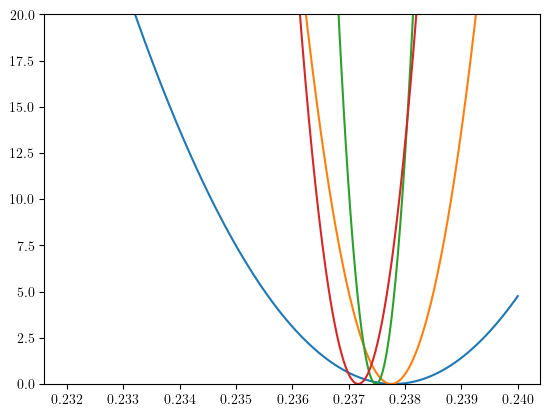

In [12]:
q_bins = fluxes_dict["500GeV"]["q_bins_GeV"]
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2
q_regions = [q_bins[0], q_bins[9], q_bins[15], q_bins[21], q_bins[-1]]


h_nuebar_null, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_500GeV_running), weights=nuebar_wgts_500GeV_running, bins=q_bins)
h_nue_null, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_500GeV_running), weights=nue_wgts_500GeV_running, bins=q_bins)
h_numubar_null, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_500GeV_running), weights=numubar_wgts_500GeV_running, bins=q_bins)
h_numu_null, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_500GeV_running), weights=numu_wgts_500GeV_running, bins=q_bins)

# totals
total_mup_null_h = h_nue_null + h_numubar_null
total_mum_null_h = h_nuebar_null + h_numu_null

mum_null_h_I = total_mum_null_h[0:9]
mum_null_h_II = total_mum_null_h[9:15]
mum_null_h_III = total_mum_null_h[15:21]
mum_null_h_IV = total_mum_null_h[21:-1]

mup_null_h_I = total_mup_null_h[0:9]
mup_null_h_II = total_mup_null_h[9:15]
mup_null_h_III = total_mup_null_h[15:21]
mup_null_h_IV = total_mup_null_h[21:-1]

# Get null hyps for each region
def get_4spectrum_energies_wgts(sw2=fluxes_dict['500GeV']['SSW_MUP']):
    eves_gen_nuebar_500GeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_500GeV, flavor="ebar", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_numu_500GeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_500GeV, flavor="mu", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_nuebar_500GeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    eves_gen_numu_500GeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    nuebar_energies_500GeV, _, _, nuebar_wgts_500GeV = eves_gen_nuebar_500GeV.get_energy_theta_phi_wgt_arrays()
    numu_energies_500GeV, _, _, numu_wgts_500GeV = eves_gen_numu_500GeV.get_energy_theta_phi_wgt_arrays()

    eves_gen_nue_500GeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_500GeV, flavor="e", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_numubar_500GeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_500GeV, flavor="mubar", detector_material=Material("Ar"),
                                        detector_length=20.0, weak_mixing_angle_squared=sw2, ssw_running=False, energy_only_flux=True)
    eves_gen_nue_500GeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    eves_gen_numubar_500GeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    nue_energies_500GeV, _, _, nue_wgts_500GeV = eves_gen_nue_500GeV.get_energy_theta_phi_wgt_arrays()
    numubar_energies_500GeV, _, _, numubar_wgts_500GeV = eves_gen_numubar_500GeV.get_energy_theta_phi_wgt_arrays()

    h_nuebar, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_500GeV), weights=nuebar_wgts_500GeV, bins=q_bins)
    h_nue, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_500GeV), weights=nue_wgts_500GeV, bins=q_bins)
    h_numubar, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_500GeV), weights=numubar_wgts_500GeV, bins=q_bins)
    h_numu, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_500GeV), weights=numu_wgts_500GeV, bins=q_bins)

    return h_nuebar, h_nue, h_numubar, h_numu


# Run the SSW scan, collect all 4 chi^2 for each region
ssw_vals = np.linspace(0.232, 0.240, 400)
chi2_I_list = []
chi2_II_list = []
chi2_III_list = []
chi2_IV_list = []

for this_ssw in ssw_vals:
    h_nuebar, h_nue, h_numubar, h_numu = get_4spectrum_energies_wgts(this_ssw)

    # break up into regions
    total_mup_test_h = h_nue + h_numubar
    total_mum_test_h = h_nuebar + h_numu

    mum_test_h_I = total_mum_test_h[0:9]
    mum_test_h_II = total_mum_test_h[9:15]
    mum_test_h_III = total_mum_test_h[15:21]
    mum_test_h_IV = total_mum_test_h[21:-1]

    mup_test_h_I = total_mup_test_h[0:9]
    mup_test_h_II = total_mup_test_h[9:15]
    mup_test_h_III = total_mup_test_h[15:21]
    mup_test_h_IV = total_mup_test_h[21:-1]

    chi2_I = np.sum(power(mum_test_h_I - mum_null_h_I, 2)/mum_null_h_I) + np.sum(power(mup_test_h_I - mup_null_h_I, 2)/mup_null_h_I)
    chi2_II = np.sum(power(mum_test_h_II - mum_null_h_II, 2)/mum_null_h_II) + np.sum(power(mup_test_h_II - mup_null_h_II, 2)/mup_null_h_II)
    chi2_III = np.sum(power(mum_test_h_III - mum_null_h_III, 2)/mum_null_h_III) + np.sum(power(mup_test_h_III - mup_null_h_III, 2)/mup_null_h_III)
    chi2_IV = np.sum(power(mum_test_h_IV - mum_null_h_IV, 2)/mum_null_h_IV) + np.sum(power(mup_test_h_IV - mup_null_h_IV, 2)/mup_null_h_IV)

    chi2_I_list.append(chi2_I)
    chi2_II_list.append(chi2_II)
    chi2_III_list.append(chi2_III)
    chi2_IV_list.append(chi2_IV)



plt.plot(ssw_vals, chi2_I_list - min(chi2_I_list), label="I")
plt.plot(ssw_vals, chi2_II_list - min(chi2_II_list), label="II")
plt.plot(ssw_vals, chi2_III_list - min(chi2_III_list), label="III")
plt.plot(ssw_vals, chi2_IV_list - min(chi2_IV_list), label="IV")
plt.ylim((0.0, 20))
plt.show()


alphaI_idx_500GeV = (chi2_I_list - min(chi2_I_list)) <= 1.0  # 1 sigma
alphaI_vals_500GeV = [ssw_vals[alphaI_idx_500GeV][0], ssw_vals[alphaI_idx_500GeV][-1]]
bfI_500GeV = ssw_vals[np.argmin(chi2_I_list)]

alphaII_idx_500GeV = (chi2_II_list - min(chi2_II_list)) <= 1.0  # 1 sigma
alphaII_vals_500GeV = [ssw_vals[alphaII_idx_500GeV][0], ssw_vals[alphaII_idx_500GeV][-1]]
bfII_500GeV = ssw_vals[np.argmin(chi2_II_list)]

alphaIII_idx_500GeV = (chi2_III_list - min(chi2_III_list)) <= 1.0  # 1 sigma
alphaIII_vals_500GeV = [ssw_vals[alphaIII_idx_500GeV][0], ssw_vals[alphaIII_idx_500GeV][-1]]
bfIII_500GeV = ssw_vals[np.argmin(chi2_III_list)]

alphaIV_idx_500GeV = (chi2_IV_list - min(chi2_IV_list)) <= 1.0  # 1 sigma
alphaIV_vals_500GeV = [ssw_vals[alphaIV_idx_500GeV][0], ssw_vals[alphaIV_idx_500GeV][-1]]
bfIV_500GeV = ssw_vals[np.argmin(chi2_IV_list)]


### Get relative percent errors for each region

In [17]:
print("sqrt(s) = 10 TeV:")
print("Region I rel error = {}".format(100*(alphaI_vals[1] - alphaI_vals[0]) / bfI / 2))
print("Region II rel error = {}".format(100*(alphaII_vals[1] - alphaII_vals[0]) / bfIII / 2))
print("Region III rel error = {}".format(100*(alphaIII_vals[1] - alphaIII_vals[0]) / bfIII / 2))
print("Region IV rel error = {}".format(100*(alphaIV_vals[1] - alphaIV_vals[0]) / bfIV / 2))

print("sqrt(s) = 3 TeV:")
print("Region I rel error = {}".format(100*(alphaI_vals_3TeV[1] - alphaI_vals_3TeV[0]) / bfI_3TeV / 2))
print("Region II rel error = {}".format(100*(alphaII_vals_3TeV[1] - alphaII_vals_3TeV[0]) / bfIII_3TeV / 2))
print("Region III rel error = {}".format(100*(alphaIII_vals_3TeV[1] - alphaIII_vals_3TeV[0]) / bfIII_3TeV / 2))
print("Region IV rel error = {}".format(100*(alphaIV_vals_3TeV[1] - alphaIV_vals_3TeV[0]) / bfIV_3TeV / 2))

print("sqrt(s) = 0.5 TeV:")
print("Region I rel error = {}".format(100*(alphaI_vals_500GeV[1] - alphaI_vals_500GeV[0]) / bfI_500GeV / 2))
print("Region II rel error = {}".format(100*(alphaII_vals_500GeV[1] - alphaII_vals_500GeV[0]) / bfIII_500GeV / 2))
print("Region III rel error = {}".format(100*(alphaIII_vals_500GeV[1] - alphaIII_vals_500GeV[0]) / bfIII_500GeV / 2))
print("Region IV rel error = {}".format(100*(alphaIV_vals_500GeV[1] - alphaIV_vals_500GeV[0]) / bfIV_500GeV / 2))


sqrt(s) = 10 TeV:
Region I rel error = 0.2571886331056559
Region II rel error = 0.05500084616686448
Region III rel error = 0.016923337282110346
Region IV rel error = 0.00848680302130103
sqrt(s) = 3 TeV:
Region I rel error = 0.3035413153456988
Region II rel error = 0.08452370890034983
Region III rel error = 0.029583298115124192
Region IV rel error = 0.021181055663812173
sqrt(s) = 0.5 TeV:
Region I rel error = 0.4215851602023597
Region II rel error = 0.13508949679162266
Region III rel error = 0.05488010807159781
Region IV rel error = 0.09299179981401882


## Combined SSW Sensitivity 6 panel plot

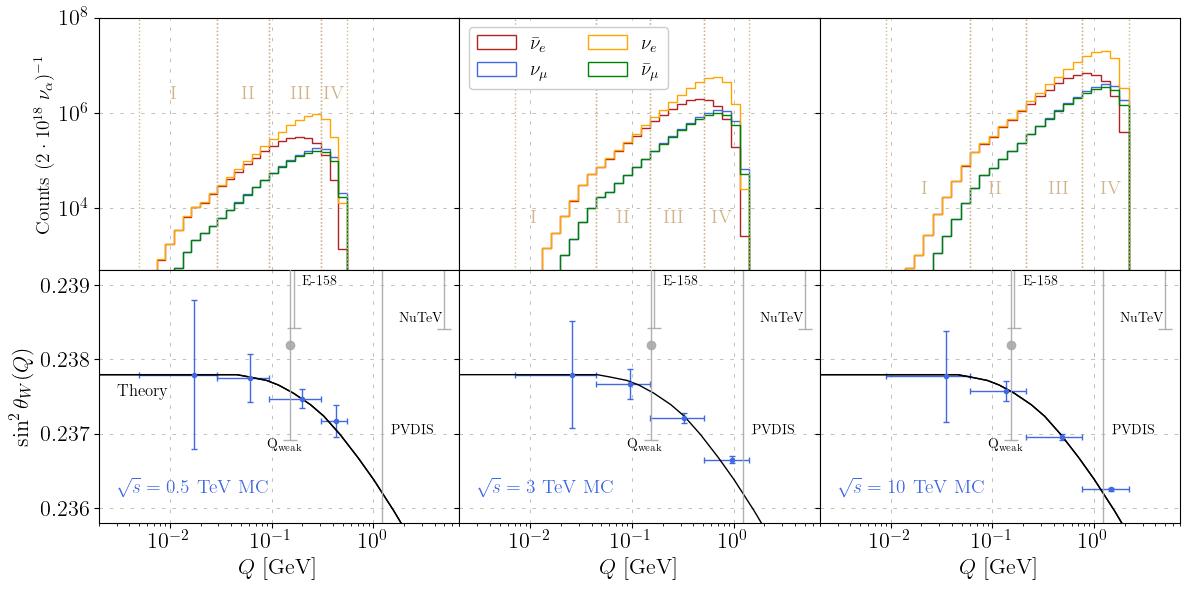

In [74]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
nuDIS = [5.0, 0.24, 0.00159]  # NuTeV
eDIS = [1.0, 0.224, 0.02]
E158 = [0.16, 0.2397, 0.00128]
APV = [2.35e-3, 0.2355, 0.002]
Qweak = [0.158, 0.2382, 0.00128062]
PVDIS = [1.2245, 0.23523, 0.00423]

fig, ((ax5, ax3, ax1), (ax6, ax4, ax2)) = plt.subplots(2, 3, figsize=(12, 6),
                                                       sharex=True, gridspec_kw=dict(hspace=0, wspace=0))

# 0.5  3  10
# ax5 ax3 ax1
# ax6 ax4 ax2

# bins and regions
q_bins = fluxes_dict["10TeV"]["q_bins_GeV"]
q_bins_3TeV = fluxes_dict["3TeV"]["q_bins_GeV"]
q_bins_500GeV = fluxes_dict["500GeV"]["q_bins_GeV"]

q_regions = [q_bins[0], q_bins[9], q_bins[15], q_bins[21], q_bins[-1]]
q_regions_3TeV = [q_bins_3TeV[0], q_bins_3TeV[9], q_bins_3TeV[15], q_bins_3TeV[21], q_bins_3TeV[-1]]
q_regions_500GeV = [q_bins_500GeV[0], q_bins_500GeV[9], q_bins_500GeV[15], q_bins_500GeV[21], q_bins_500GeV[-1]]


#### UPPER PANELS
region_color = 'tan'

# 500 GeV
ax5.hist(1e-3*sqrt(2*M_E*nuebar_energies_500GeV_running), weights=nuebar_wgts_500GeV_running, bins=q_bins_500GeV, histtype='step',
         label=r"$\bar{\nu}_e$", color='firebrick')
ax5.hist(1e-3*sqrt(2*M_E*numu_energies_500GeV_running), weights=numu_wgts_500GeV_running, bins=q_bins_500GeV, histtype='step',
         label=r"$\nu_\mu$", color='royalblue')

ax5.hist(1e-3*sqrt(2*M_E*nue_energies_500GeV_running), weights=nue_wgts_500GeV_running, bins=q_bins_500GeV, histtype='step',
         label=r"$\nu_e$", color='orange')
ax5.hist(1e-3*sqrt(2*M_E*numubar_energies_500GeV_running), weights=numubar_wgts_500GeV_running, bins=q_bins_500GeV, histtype='step',
         label=r"$\bar{\nu}_\mu$", color='g')

ax5.vlines([q_regions_500GeV[0], q_regions_500GeV[1]], ymin=0.0, ymax=1e8, edgecolor=region_color, 
                   linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)
ax5.vlines([q_regions_500GeV[1], q_regions_500GeV[2]], ymin=0.0, ymax=1e8, edgecolor=region_color,
                  linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)
ax5.vlines([q_regions_500GeV[2], q_regions_500GeV[3]], ymin=0.0, ymax=1e8, edgecolor=region_color,
                  linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)
ax5.vlines([q_regions_500GeV[3], q_regions_500GeV[4]], ymin=0.0, ymax=1e8, edgecolor=region_color,
                  linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)

ax5.text(1e-2, 2e6, "I", fontsize=14, color=region_color)
ax5.text(5e-2, 2e6, "II", fontsize=14, color=region_color)
ax5.text(0.15, 2e6, "III", fontsize=14, color=region_color)
ax5.text(0.32, 2e6, "IV", fontsize=14, color=region_color)

ax5.set_xlim((q_bins[0], q_bins[-1]))
ax5.set_xscale('log')
ax5.set_yscale('log')

ax5.set_ylim((500, 1e8))
ax5.tick_params(axis="y", labelsize=16)

# 3 TeV
ax3.hist(1e-3*sqrt(2*M_E*nuebar_energies_3TeV_running), weights=nuebar_wgts_3TeV_running, bins=q_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_e$", color='firebrick')
ax3.hist(1e-3*sqrt(2*M_E*numu_energies_3TeV_running), weights=numu_wgts_3TeV_running, bins=q_bins_3TeV, histtype='step',
         label=r"$\nu_\mu$", color='royalblue')

ax3.hist(1e-3*sqrt(2*M_E*nue_energies_3TeV_running), weights=nue_wgts_3TeV_running, bins=q_bins_3TeV, histtype='step',
         label=r"$\nu_e$", color='orange')
ax3.hist(1e-3*sqrt(2*M_E*numubar_energies_3TeV_running), weights=numubar_wgts_3TeV_running, bins=q_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_\mu$", color='g')

ax3.vlines([q_regions_3TeV[0], q_regions_3TeV[1]], ymin=0.0, ymax=1e8, edgecolor=region_color, 
                   linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)
ax3.vlines([q_regions_3TeV[1], q_regions_3TeV[2]], ymin=0.0, ymax=1e8, edgecolor=region_color,
                  linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)
ax3.vlines([q_regions_3TeV[2], q_regions_3TeV[3]], ymin=0.0, ymax=1e8, edgecolor=region_color,
                  linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)
ax3.vlines([q_regions_3TeV[3], q_regions_3TeV[4]], ymin=0.0, ymax=1e8, edgecolor=region_color,
                  linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)


ax3.text(0.01, 5000.0, "I", fontsize=14, color=region_color)
ax3.text(0.07, 5000.0, "II", fontsize=14, color=region_color)
ax3.text(0.2, 5000.0, "III", fontsize=14, color=region_color)
ax3.text(0.6, 5000.0, "IV", fontsize=14, color=region_color)

ax3.set_xlim((q_bins[0], q_bins[-1]))
ax3.set_xscale('log')
ax3.set_yscale('log')

ax3.set_ylim((500, 1e8))
ax3.tick_params(axis="y", labelsize=16)


# 10 TeV
ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$", color='firebrick')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$", color='royalblue')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_e$", color='orange')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$", color='g')


ax1.vlines([q_regions[0], q_regions[1]], ymin=0.0, ymax=1e8, edgecolor=region_color, 
                   linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)
ax1.vlines([q_regions[1], q_regions[2]], ymin=0.0, ymax=1e8, edgecolor=region_color,
                  linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)
ax1.vlines([q_regions[2], q_regions[3]], ymin=0.0, ymax=1e8, edgecolor=region_color,
                  linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)
ax1.vlines([q_regions[3], q_regions[4]], ymin=0.0, ymax=1e8, edgecolor=region_color,
                  linestyle='dotted', alpha=1.0, facecolor='none', linewidth=1.0)


ax1.text(0.02, 20000.0, "I", fontsize=14, color=region_color)
ax1.text(0.09, 20000.0, "II", fontsize=14, color=region_color)
ax1.text(0.35, 20000.0, "III", fontsize=14, color=region_color)
ax1.text(1.15, 20000.0, "IV", fontsize=14, color=region_color)



ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylim((500, 1e8))
ax1.tick_params(axis="y", labelsize=16)


# set y axis label
ax5.set_ylabel(r"Counts $(2\cdot 10^{18}$ $\nu_\alpha)^{-1}$", fontsize=14)

# set legend
ax3.legend(loc="upper left", fontsize=14, ncols=2, framealpha=1.0)



###### BOTTOM PANELS: sin^2(theta) plot

### plot MC sensitivity
sw2_yrange = (0.2358, 0.2392)
mc_color = 'royalblue'

# 10 TeV
ax2.errorbar((q_regions[0]+q_regions[1])/2, bfI, yerr=(alphaI_vals[1] - alphaI_vals[0])/2,
             xerr=(q_regions[1] - q_regions[0])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax2.errorbar((q_regions[1]+q_regions[2])/2, bfII, yerr=(alphaII_vals[1] - alphaII_vals[0])/2,
             xerr=(q_regions[2] - q_regions[1])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax2.errorbar((q_regions[2]+q_regions[3])/2, bfIII, yerr=(alphaIII_vals[1] - alphaIII_vals[0])/2,
             xerr=(q_regions[3] - q_regions[2])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax2.errorbar((q_regions[3]+q_regions[4])/2, bfIV, yerr=(alphaIV_vals[1] - alphaIV_vals[0])/2,
             xerr=(q_regions[4] - q_regions[3])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax2.plot(sw2_dat[:,0], sw2_dat[:,1], color='k', linewidth=1.0)

ax2.text(0.003, 0.2362, r"$\sqrt{s}=10$ TeV MC", fontsize=14, color=mc_color)

ax6.text(0.003, 0.2375, "Theory", fontsize=12, color='k')


ax2.set_xscale('log')
ax2.set_ylim(sw2_yrange)
ax2.set_xlim((2e-3,7))


# 3 TeV
ax4.errorbar((q_regions_3TeV[0]+q_regions_3TeV[1])/2, bfI_3TeV, yerr=(alphaI_vals_3TeV[1] - alphaI_vals_3TeV[0])/2,
             xerr=(q_regions_3TeV[1] - q_regions_3TeV[0])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax4.errorbar((q_regions_3TeV[1]+q_regions_3TeV[2])/2, bfII_3TeV, yerr=(alphaII_vals_3TeV[1] - alphaII_vals_3TeV[0])/2,
             xerr=(q_regions_3TeV[2] - q_regions_3TeV[1])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax4.errorbar((q_regions_3TeV[2]+q_regions_3TeV[3])/2, bfIII_3TeV, yerr=(alphaIII_vals_3TeV[1] - alphaIII_vals_3TeV[0])/2,
             xerr=(q_regions_3TeV[3] - q_regions_3TeV[2])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax4.errorbar((q_regions_3TeV[3]+q_regions_3TeV[4])/2, bfIV_3TeV, yerr=(alphaIV_vals_3TeV[1] - alphaIV_vals_3TeV[0])/2,
             xerr=(q_regions_3TeV[4] - q_regions_3TeV[3])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax4.text(0.003, 0.2362, r"$\sqrt{s}=3$ TeV MC", fontsize=14, color=mc_color)

ax4.set_xscale('log')
ax4.set_ylim(sw2_yrange)
ax4.set_xlim((2e-3,7))


# 500 GeV
ax6.errorbar((q_regions_500GeV[0]+q_regions_500GeV[1])/2, bfI_500GeV, yerr=(alphaI_vals_500GeV[1] - alphaI_vals_500GeV[0])/2,
             xerr=(q_regions_500GeV[1] - q_regions_500GeV[0])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax6.errorbar((q_regions_500GeV[1]+q_regions_500GeV[2])/2, bfII_500GeV, yerr=(alphaII_vals_500GeV[1] - alphaII_vals_500GeV[0])/2,
             xerr=(q_regions_500GeV[2] - q_regions_500GeV[1])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax6.errorbar((q_regions_500GeV[2]+q_regions_500GeV[3])/2, bfIII_500GeV, yerr=(alphaIII_vals_500GeV[1] - alphaIII_vals_500GeV[0])/2,
             xerr=(q_regions_500GeV[3] - q_regions_500GeV[2])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax6.errorbar((q_regions_500GeV[3]+q_regions_500GeV[4])/2, bfIV_500GeV, yerr=(alphaIV_vals_500GeV[1] - alphaIV_vals_500GeV[0])/2,
             xerr=(q_regions_500GeV[4] - q_regions_500GeV[3])/2,
             color=mc_color, marker='.', capsize=2, elinewidth=1.0)

ax6.plot(sw2_dat[:,0], sw2_dat[:,1], color='k', linewidth=1.0)

ax6.text(0.003, 0.2362, r"$\sqrt{s}=0.5$ TeV MC", fontsize=14, color=mc_color)

ax6.set_xscale('log')
ax6.set_ylim(sw2_yrange)
ax6.set_xlim((2e-3,7))


# Label existing bounds
meas_fs = 10
meas_col = 'darkgray'
ax6.plot(sw2_dat[:,0], sw2_dat[:,1], color='k', linewidth=1.0)
ax6.errorbar(nuDIS[0], nuDIS[1], yerr=nuDIS[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax6.errorbar(E158[0]+0.005, E158[1], yerr=E158[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax6.errorbar(Qweak[0]-0.005, Qweak[1], yerr=Qweak[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, zorder=9, elinewidth=1.0)
ax6.errorbar(PVDIS[0], PVDIS[1], yerr=PVDIS[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax6.text(2e-1, 0.239, "E-158", fontsize=meas_fs)
ax6.text(9e-2, 0.2368, r"Q$_{\rm weak}$", fontsize=meas_fs)
ax6.text(1.8, 0.2385, r"NuTeV", fontsize=meas_fs)
ax6.text(1.5, 0.237, r"PVDIS", fontsize=meas_fs)

ax4.plot(sw2_dat[:,0], sw2_dat[:,1], color='k', linewidth=1.0)
ax4.errorbar(nuDIS[0], nuDIS[1], yerr=nuDIS[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax4.errorbar(E158[0]+0.005, E158[1], yerr=E158[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax4.errorbar(Qweak[0]-0.005, Qweak[1], yerr=Qweak[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, zorder=9, elinewidth=1.0)
ax4.errorbar(PVDIS[0], PVDIS[1], yerr=PVDIS[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax4.text(2e-1, 0.239, "E-158", fontsize=meas_fs)
ax4.text(9e-2, 0.2368, r"Q$_{\rm weak}$", fontsize=meas_fs)
ax4.text(1.8, 0.2385, r"NuTeV", fontsize=meas_fs)
ax4.text(1.5, 0.237, r"PVDIS", fontsize=meas_fs)

ax2.plot(sw2_dat[:,0], sw2_dat[:,1], color='k', linewidth=1.0)
ax2.errorbar(nuDIS[0], nuDIS[1], yerr=nuDIS[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax2.errorbar(E158[0]+0.005, E158[1], yerr=E158[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax2.errorbar(Qweak[0]-0.005, Qweak[1], yerr=Qweak[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, zorder=9, elinewidth=1.0)
ax2.errorbar(PVDIS[0], PVDIS[1], yerr=PVDIS[2], color=meas_col, marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax2.text(2e-1, 0.239, "E-158", fontsize=meas_fs)
ax2.text(9e-2, 0.2368, r"Q$_{\rm weak}$", fontsize=meas_fs)
ax2.text(1.8, 0.2385, r"NuTeV", fontsize=meas_fs)
ax2.text(1.5, 0.237, r"PVDIS", fontsize=meas_fs)


# Set x and y axis labels
ax6.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax4.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax2.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax6.set_ylabel(r"$\sin^2 \theta_W (Q)$", fontsize=16)

# Set tick sizes
ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)
ax3.tick_params(axis="x", labelsize=16)
ax3.tick_params(axis="y", labelsize=16)
ax4.tick_params(axis="x", labelsize=16)
ax4.tick_params(axis="y", labelsize=16)
ax5.tick_params(axis="x", labelsize=16)
ax5.tick_params(axis="y", labelsize=16)
ax6.tick_params(axis="x", labelsize=16)
ax6.tick_params(axis="y", labelsize=16)

# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.7, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.7, color='gray', dashes=(5,10))
ax3.grid(True, linestyle='-', linewidth=0.5, alpha=0.7, color='gray', dashes=(5,10))
ax4.grid(True, linestyle='-', linewidth=0.5, alpha=0.7, color='gray', dashes=(5,10))
ax5.grid(True, linestyle='-', linewidth=0.5, alpha=0.7, color='gray', dashes=(5,10))
ax6.grid(True, linestyle='-', linewidth=0.5, alpha=0.7, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Remove y-axis labels/ticks from 2nd and 3rd columns
for ax in [ax3, ax1, ax4, ax2]:
    ax.set_ylabel("")
    ax.tick_params(labelleft=False)

# Final adjustments and save
plt.tight_layout()

fig.subplots_adjust(hspace=0.0, wspace=0.0)


plt.savefig("plots/weak_mixing/SSW_regions_sensitivity.png", dpi=300)
plt.show()

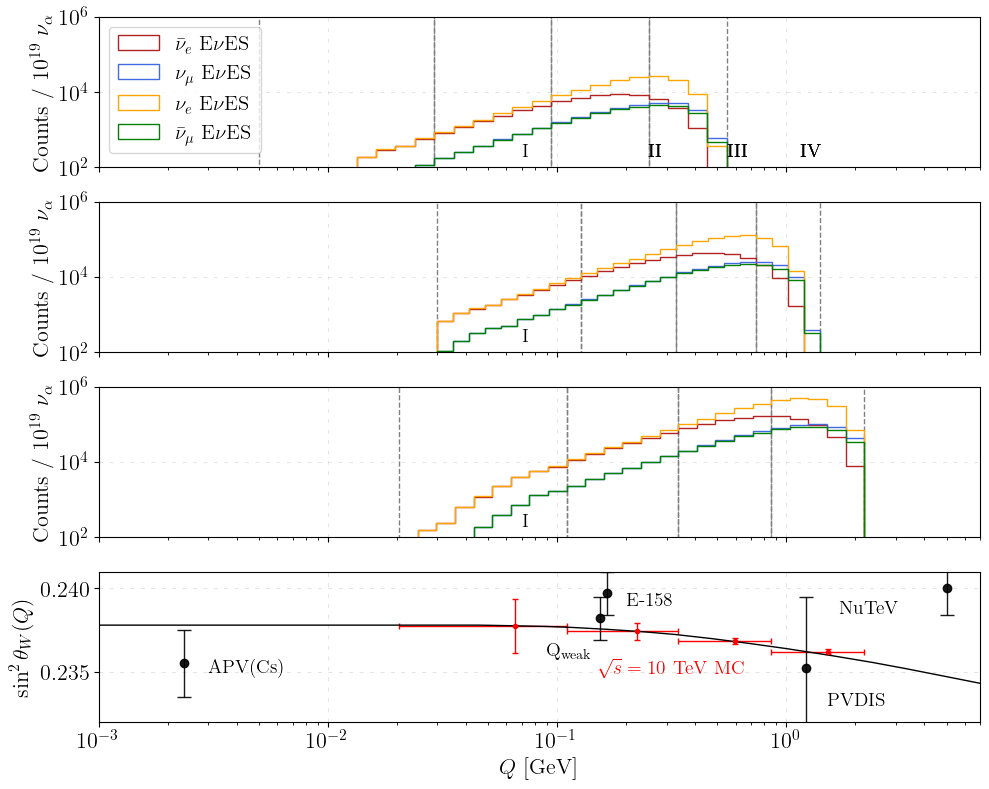

In [ ]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
nuDIS = [5.0, 0.24, 0.00159]  # NuTeV
eDIS = [1.0, 0.224, 0.02]
E158 = [0.16, 0.2397, 0.00128]
APV = [2.35e-3, 0.2355, 0.002]
Qweak = [0.158, 0.2382, 0.00128062]
PVDIS = [1.2245, 0.23523, 0.00423]

q_bins_500 = fluxes_dict["500GeV"]["q_bins_GeV"]
q_regions_500 = [q_bins_500[0], q_bins_500[9], q_bins_500[15], q_bins_500[20], q_bins_500[-1]]
q_bins_3TeV = fluxes_dict["3TeV"]["q_bins_GeV"]
q_regions_3TeV = [q_bins_3TeV[0], q_bins_3TeV[9], q_bins_3TeV[15], q_bins_3TeV[20], q_bins_3TeV[-1]]
q_bins_10TeV = fluxes_dict["10TeV"]["q_bins_GeV"]
q_regions_10TeV = [q_bins_10TeV[0], q_bins_10TeV[9], q_bins_10TeV[15], q_bins_10TeV[20], q_bins_10TeV[-1]]


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax_list = [ax1, ax2, ax3]
q_bins_list = [q_bins_500, q_bins_3TeV, q_bins_10TeV]

# 500 GeV
ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_500GeV_running), weights=nuebar_wgts_500GeV_running, bins=q_bins_500, histtype='step',
        label=r"$\bar{\nu}_e$ E$\nu$ES", color='firebrick')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_500GeV_running), weights=numu_wgts_500GeV_running, bins=q_bins_500, histtype='step',
        label=r"$\nu_\mu$ E$\nu$ES", color='royalblue')
ax1.hist(1e-3*sqrt(2*M_E*nue_energies_500GeV_running), weights=nue_wgts_500GeV_running, bins=q_bins_500, histtype='step',
        label=r"$\nu_e$ E$\nu$ES", color='orange')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_500GeV_running), weights=numubar_wgts_500GeV_running, bins=q_bins_500, histtype='step',
        label=r"$\bar{\nu}_\mu$ E$\nu$ES", color='g')

# 3 TeV
ax2.hist(1e-3*sqrt(2*M_E*nuebar_energies_3TeV_running), weights=nuebar_wgts_3TeV_running, bins=q_bins_3TeV, histtype='step',
        color='firebrick')
ax2.hist(1e-3*sqrt(2*M_E*numu_energies_3TeV_running), weights=numu_wgts_3TeV_running, bins=q_bins_3TeV, histtype='step',
        color='royalblue')
ax2.hist(1e-3*sqrt(2*M_E*nue_energies_3TeV_running), weights=nue_wgts_3TeV_running, bins=q_bins_3TeV, histtype='step',
        color='orange')
ax2.hist(1e-3*sqrt(2*M_E*numubar_energies_3TeV_running), weights=numubar_wgts_3TeV_running, bins=q_bins_3TeV, histtype='step',
        color='g')

# 10 TeV
ax3.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins_10TeV, histtype='step',
        color='firebrick')
ax3.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins_10TeV, histtype='step',
        color='royalblue')
ax3.hist(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins_10TeV, histtype='step',
        color='orange')
ax3.hist(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins_10TeV, histtype='step',
        color='g')

for i, ax in enumerate(ax_list):
    q_bins = q_bins_list[i]

    # regions
    q_regions = [q_bins[0], q_bins[9], q_bins[15], q_bins[20], q_bins[-1]]
    ax.fill_betweenx([0.0, 1e7], q_regions[0], q_regions[1], color='gray',
                    alpha=1.0, facecolor='None', linewidth=1.0, ls='dashed')
    ax.fill_betweenx([0.0, 1e7], q_regions[1], q_regions[2], color='gray',
                    alpha=1.0, facecolor='None', linewidth=1.0, ls='dashed')
    ax.fill_betweenx([0.0, 1e7], q_regions[2], q_regions[3], color='gray',
                    alpha=1.0, facecolor='None', linewidth=1.0, ls='dashed')
    ax.fill_betweenx([0.0, 1e7], q_regions[3], q_regions[4], color='gray',
                    alpha=1.0, facecolor='None', linewidth=1.0, ls='dashed')

    ax.text(0.07, 200.0, "I", fontsize=14)
    ax1.text(0.250, 200.0, "II", fontsize=14)
    ax1.text(0.550, 200.0, "III", fontsize=14)
    ax1.text(1.15, 200.0, "IV", fontsize=14)

    if i == 0:
        ax.legend(loc="upper left", fontsize=15)
    
    ax.set_ylabel(r"Counts / $10^{19}$ $\nu_\alpha$", fontsize=16)
    ax.set_xlim((q_bins[0], q_bins[-1]))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim((100, 1e6))
    ax.tick_params(axis="x", labelsize=16)
    ax.tick_params(axis="y", labelsize=16)

# Bottom panel: sin^2(theta) plot

# plot MC sensitivity
ax4.errorbar((q_regions[0]+q_regions[1])/2, bfI, yerr=(alphaI_vals[1] - alphaI_vals[0])/2,
             xerr=(q_regions[1] - q_regions[0])/2,
             color='r', marker='.', capsize=2, elinewidth=1.0)

ax4.errorbar((q_regions[1]+q_regions[2])/2, bfII, yerr=(alphaII_vals[1] - alphaII_vals[0])/2,
             xerr=(q_regions[2] - q_regions[1])/2,
             color='r', marker='.', capsize=2, elinewidth=1.0)

ax4.errorbar((q_regions[2]+q_regions[3])/2, bfIII, yerr=(alphaIII_vals[1] - alphaIII_vals[0])/2,
             xerr=(q_regions[3] - q_regions[2])/2,
             color='r', marker='.', capsize=2, elinewidth=1.0)

ax4.errorbar((q_regions[3]+q_regions[4])/2, bfIV, yerr=(alphaIV_vals[1] - alphaIV_vals[0])/2,
             xerr=(q_regions[4] - q_regions[3])/2,
             color='r', marker='.', capsize=2, elinewidth=1.0)


# Sine squared theta plot
ax4.plot(sw2_dat[:,0], sw2_dat[:,1], color='k', linewidth=1.0)
ax4.errorbar(nuDIS[0], nuDIS[1], yerr=nuDIS[2], color='k', marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax4.errorbar(E158[0]+0.005, E158[1], yerr=E158[2], color='k', marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
ax4.errorbar(APV[0], APV[1], yerr=APV[2], color='k', marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)
#ax2.errorbar(eDIS[0], eDIS[1], yerr=eDIS[2], color='k', marker='o', ls='none', capsize=3)
ax4.errorbar(Qweak[0]-0.005, Qweak[1], yerr=Qweak[2], color='k', marker='o', ls='none', capsize=5, alpha=0.9, zorder=9, elinewidth=1.0)
ax4.errorbar(PVDIS[0], PVDIS[1], yerr=PVDIS[2], color='k', marker='o', ls='none', capsize=5, alpha=0.9, elinewidth=1.0)

ax4.text(3e-3, 0.235, "APV(Cs)", fontsize=14)
ax4.text(2e-1, 0.239, "E-158", fontsize=14)
ax4.text(9e-2, 0.236, r"Q$_{\rm weak}$", fontsize=14)
ax4.text(1.7, 0.2385, r"NuTeV", fontsize=14)
ax4.text(1.5, 0.233, r"PVDIS", fontsize=14)

ax4.text(0.15, 0.2349, r"$\sqrt{s}=10$ TeV MC", fontsize=14, color='r')

ax4.set_xscale('log')
ax4.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax4.set_ylabel(r"$\sin^2 \theta_W (Q)$", fontsize=16)
ax4.set_ylim((0.232, 0.241))
ax4.set_xlim((1e-3,7))

ax4.tick_params(axis="x", labelsize=16)
ax4.tick_params(axis="y", labelsize=16)
ax4.tick_params(axis="x", labelsize=16)
ax4.tick_params(axis="y", labelsize=16)

fig.subplots_adjust(hspace=0)

# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax3.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax4.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))

for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Final adjustments and save
plt.tight_layout()
plt.savefig("plots/weak_mixing/SSW_regions_sensitivity_4panel.png", dpi=300)
plt.show()

### $\chi^2$ analysis of the running + pseudoexperiments

Check where the histogram is bigger than 10 events for a sensible $\chi^2$

In [5]:
np.where(h_numubar >= 10)

(array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40]),)

In [6]:
print(h_numubar[15:-7])

ndof_sw_running = h_numubar[16:-8].shape[0]

[8.51536912e+00 1.51266596e+01 3.13734817e+01 8.00921601e+01
 1.39860973e+02 2.88931913e+02 6.95342876e+02 1.13601308e+03
 2.31980478e+03 2.77358675e+03 3.82353089e+03 6.13481379e+03
 8.04668342e+03 1.25748521e+04 1.69314020e+04 2.38929547e+04
 3.40327975e+04 4.60207197e+04 6.23320485e+04 8.16946246e+04
 1.03928883e+05 1.25584512e+05 1.42060499e+05 1.42735624e+05
 1.15995078e+05 5.16569251e+04 0.00000000e+00]


Do a vanilla chi2 without pseudoexperiments

In [7]:
chi2_nuebar = np.sum((h_nuebar[16:-8]-h_nuebar_run[16:-8])**2 / (h_nuebar_run[16:-8] + 1))
chi2_numu = np.sum((h_numu[16:-8]-h_numu_run[16:-8])**2 / (h_numu_run[16:-8] + 1))
chi2_nue = np.sum((h_nue[16:-8]-h_nue_run[16:-8])**2 / (h_nue_run[16:-8] + 1))
chi2_numubar = np.sum((h_numubar[16:-8]-h_numubar_run[16:-8])**2 / (h_numubar_run[16:-8] + 1))

ndof_mu_plus = (h_nue[16:-8].shape[0] + h_numubar[16:-8].shape[0])
ndof_mu_minus = (h_nuebar[16:-8].shape[0] + h_numu[16:-8].shape[0])

print("chi2 nuebar = {}, chi2_numu = {}, sum / dof = {}".format(chi2_nuebar, chi2_numu, (chi2_nuebar + chi2_numu)/ndof_sw_running/2))
print("chi2 nue = {}, chi2_numubar = {}, sum / dof = {}".format(chi2_nue, chi2_numubar, (chi2_nue + chi2_numubar)/ndof_sw_running/2))


crit_chi2_mu_plus = chi2.ppf(0.9, 2*ndof_sw_running)
crit_chi2_mu_minus = chi2.ppf(0.9, 2*ndof_sw_running)

print("crit chi^2 mu+ = {} vs. {}".format(crit_chi2_mu_plus, (chi2_nue + chi2_numubar)))

print("crit chi^2 mu- = {} vs. {}".format(crit_chi2_mu_minus, (chi2_nuebar + chi2_numu)))

print("N sigma for mu- mode = {}".format(chi2.cdf(chi2_nuebar + chi2_numu, 2*ndof_sw_running)))
print("N sigma for mu- mode = {}".format(chi2.cdf(chi2_nue + chi2_numubar, 2*ndof_sw_running)))

chi2 nuebar = 13.44273910543452, chi2_numu = 2.5139619713305335, sum / dof = 0.31913402153530107
chi2 nue = 14.658662969695106, chi2_numubar = 1.427405236350646, sum / dof = 0.32172136412091507
crit chi^2 mu+ = 63.167121005726315 vs. 16.086068206045752
crit chi^2 mu- = 63.167121005726315 vs. 15.956701076765054
N sigma for mu- mode = 1.1180978284763176e-06
N sigma for mu- mode = 1.286925372266554e-06


### Run pseudoexperiments: data generated from a running $\sin^2\theta_W$ vs $\chi^2$ distributions assuming a fixed $\sin^2\theta_W$ and the running version

(100000,)
102.96179487345626
15.57475902663171
140.88126355952306
24.63370279986978


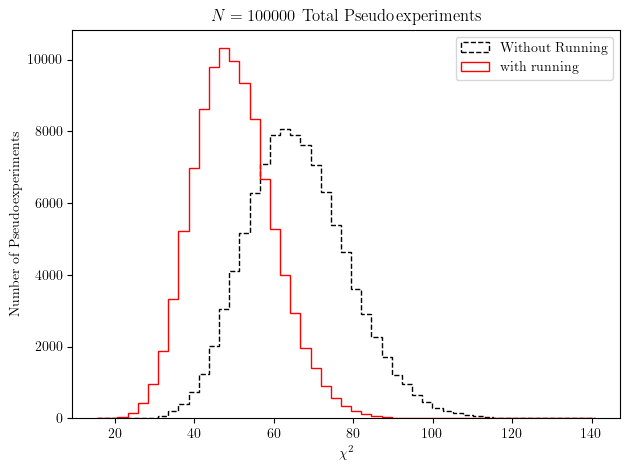

Median for no running =  65.30145089748156
Median for running hyp =  49.39890836461889
90% quantile for running hyp =  63.167121005726315


In [8]:
from scipy.stats import norm

# run 10,000 pseudoexperiments
nuebar_pdata = norm.rvs(loc=h_nuebar_run[16:-8], scale=np.sqrt(h_nuebar_run[16:-8]), size=(100000, ndof_sw_running))
numu_pdata = norm.rvs(loc=h_numu_run[16:-8], scale=np.sqrt(h_numu_run[16:-8]), size=(100000, ndof_sw_running))

chi2_pdata_norunning = np.sum(np.power(h_numu[16:-8] - numu_pdata, 2)/h_numu[16:-8], axis=1) \
    + np.sum(np.power(h_nuebar[16:-8] - nuebar_pdata, 2)/h_nuebar[16:-8], axis=1)
chi2_pdata_running = np.sum(np.power(h_numu_run[16:-8] - numu_pdata, 2)/h_numu_run[16:-8], axis=1) \
    + np.sum(np.power(h_nuebar_run[16:-8] - nuebar_pdata, 2)/h_nuebar_run[16:-8], axis=1)

print(chi2_pdata_norunning.shape)

print(max(chi2_pdata_running))
print(min(chi2_pdata_running))

print(max(chi2_pdata_norunning))
print(min(chi2_pdata_norunning))

chi2_bins = np.linspace(min(chi2_pdata_running), max(chi2_pdata_norunning), 50)


plt.hist(chi2_pdata_norunning, bins=chi2_bins, label="Without Running", color='k', histtype='step', ls='dashed')
plt.hist(chi2_pdata_running, bins=chi2_bins, label="with running", color='r', histtype='step')
plt.legend()
plt.xlabel(r"$\chi^2$")
plt.ylabel("Number of Pseudoexperiments")
plt.title(r"$N = 100000$ Total Pseudoexperiments")
plt.tight_layout()
plt.show()

median_running = np.median(chi2_pdata_running)
median_norunning = np.median(chi2_pdata_norunning)

print("Median for no running = ", median_norunning)
print("Median for running hyp = ", median_running)

print("90% quantile for running hyp = ", chi2.ppf(0.9, 2*ndof_sw_running))

Define functions to take any value of $\sin^2\theta_W$

In [9]:
def get_4spectrum_energies_wgts(sw2=fluxes_dict['10TeV']['SSW']):
    eves_gen_nuebar_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                        detector_length=10.0, weak_mixing_angle_squared=sw2, ssw_running=False)
    eves_gen_numu_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                        detector_length=10.0, weak_mixing_angle_squared=sw2, ssw_running=False)
    eves_gen_nuebar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    eves_gen_numu_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    nuebar_energies_10TeV, _, _, nuebar_wgts_10TeV = eves_gen_nuebar_10TeV.get_energy_theta_phi_wgt_arrays()
    numu_energies_10TeV, _, _, numu_wgts_10TeV = eves_gen_numu_10TeV.get_energy_theta_phi_wgt_arrays()

    eves_gen_nue_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                        detector_length=10.0, weak_mixing_angle_squared=sw2, ssw_running=False)
    eves_gen_numubar_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                        detector_length=10.0, weak_mixing_angle_squared=sw2, ssw_running=False)
    eves_gen_nue_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    eves_gen_numubar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
    nue_energies_10TeV, _, _, nue_wgts_10TeV = eves_gen_nue_10TeV.get_energy_theta_phi_wgt_arrays()
    numubar_energies_10TeV, _, _, numubar_wgts_10TeV = eves_gen_numubar_10TeV.get_energy_theta_phi_wgt_arrays()

    h_nuebar, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins)
    h_nue, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins)
    h_numubar, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins)
    h_numu, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins)

    return h_nuebar, h_nue, h_numubar, h_numu


Repeat the same $\chi^2$ Test but with slightly higher fixed $\sin^2\theta_W$

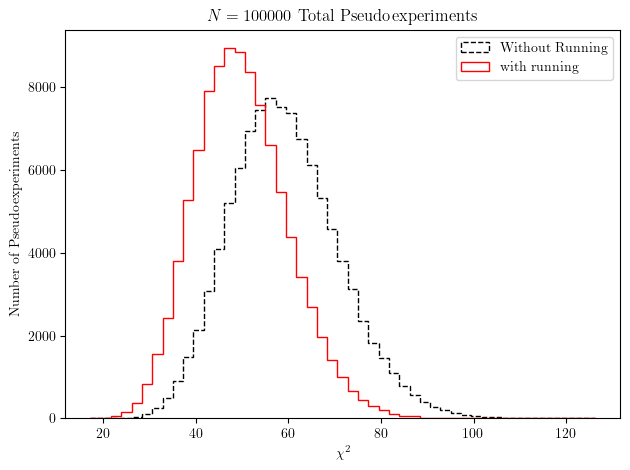

Median for no running =  58.470491397723066
Median for running hyp =  49.31877858717556
90% quantile for running hyp =  63.167121005726315
68% quantile for running hyp =  54.122272446144436


In [10]:
h_nuebar_shift, h_nue_shift, h_numubar_shift, h_numu_shift = get_4spectrum_energies_wgts(sw2=0.2363)

# run 10,000 pseudoexperiments
nuebar_pdata = norm.rvs(loc=h_nuebar_run[16:-8], scale=np.sqrt(h_nuebar_run[16:-8]), size=(100000, ndof_sw_running))
numu_pdata = norm.rvs(loc=h_numu_run[16:-8], scale=np.sqrt(h_numu_run[16:-8]), size=(100000, ndof_sw_running))

chi2_pdata_norunning = np.sum(np.power(h_numu_shift[16:-8] - numu_pdata, 2)/h_numu_shift[16:-8], axis=1) \
    + np.sum(np.power(h_nuebar_shift[16:-8] - nuebar_pdata, 2)/h_nuebar_shift[16:-8], axis=1)
chi2_pdata_running = np.sum(np.power(h_numu_run[16:-8] - numu_pdata, 2)/h_numu_run[16:-8], axis=1) \
    + np.sum(np.power(h_nuebar_run[16:-8] - nuebar_pdata, 2)/h_nuebar_run[16:-8], axis=1)


chi2_bins = np.linspace(min(chi2_pdata_running), max(chi2_pdata_norunning), 50)


plt.hist(chi2_pdata_norunning, bins=chi2_bins, label="Without Running", color='k', histtype='step', ls='dashed')
plt.hist(chi2_pdata_running, bins=chi2_bins, label="with running", color='r', histtype='step')
plt.legend()
plt.xlabel(r"$\chi^2$")
plt.ylabel("Number of Pseudoexperiments")
plt.title(r"$N = 100000$ Total Pseudoexperiments")
plt.tight_layout()
plt.show()

median_running = np.median(chi2_pdata_running)
median_norunning = np.median(chi2_pdata_norunning)

print("Median for no running = ", median_norunning)
print("Median for running hyp = ", median_running)

print("90% quantile for running hyp = ", chi2.ppf(0.9, 2*ndof_sw_running))
print("68% quantile for running hyp = ", chi2.ppf(0.68, 2*ndof_sw_running))

### Now test the $\Delta\chi^2$ for various test hypotheses of fixed $\sin^2\theta_W$

In [11]:
sin2_thetaW_list = np.linspace(0.2355, 0.2375, 20)

crit_chi2_68 = chi2.ppf(0.68, 2*ndof_sw_running)
crit_chi2_95 = chi2.ppf(0.95, 2*ndof_sw_running)

# run 10,000 pseudoexperiments
nuebar_pdata = norm.rvs(loc=h_nuebar_run[16:-8], scale=np.sqrt(h_nuebar_run[16:-8]), size=(100000, ndof_sw_running))
numu_pdata = norm.rvs(loc=h_numu_run[16:-8], scale=np.sqrt(h_numu_run[16:-8]), size=(100000, ndof_sw_running))

chi2_pdata_running = np.sum(np.power(h_numu_run[16:-8] - numu_pdata, 2)/h_numu_run[16:-8], axis=1) \
        + np.sum(np.power(h_nuebar_run[16:-8] - nuebar_pdata, 2)/h_nuebar_run[16:-8], axis=1)

median_chi2_running = np.median(chi2_pdata_running)
crit_deltaChi2_68 = crit_chi2_68 - median_chi2_running
crit_deltaChi2_95 = crit_chi2_95 - median_chi2_running

delta_chi2_list = []

for sw2 in sin2_thetaW_list:
    h_nuebar_shift, h_nue_shift, h_numubar_shift, h_numu_shift = get_4spectrum_energies_wgts(sw2=sw2)
    
    chi2_pdata_norunning = np.sum(np.power(h_numu_shift[16:-8] - numu_pdata, 2)/h_numu_shift[16:-8], axis=1) \
        + np.sum(np.power(h_nuebar_shift[16:-8] - nuebar_pdata, 2)/h_nuebar_shift[16:-8], axis=1)
    
    median_chi2_norunning = np.median(chi2_pdata_norunning)

    delta_chi2_list.append(median_chi2_norunning - median_chi2_running)


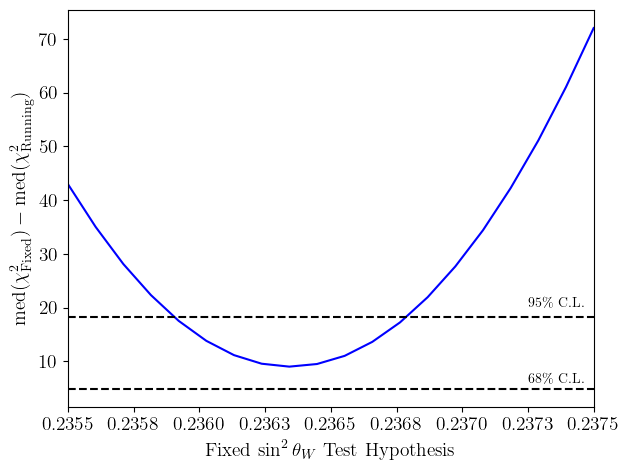

In [12]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

fig, ax = plt.subplots()

plt.plot(sin2_thetaW_list, delta_chi2_list, color='b')
plt.hlines(crit_deltaChi2_68, xmin=sin2_thetaW_list[0], xmax=sin2_thetaW_list[-1], color='k', ls='dashed')
plt.hlines(crit_deltaChi2_95, xmin=sin2_thetaW_list[0], xmax=sin2_thetaW_list[-1], color='k', ls='dashed')
plt.xlabel(r"Fixed $\sin^2\theta_W$ Test Hypothesis", fontsize=14)
plt.ylabel(r"${\rm med}(\chi^2_{\rm Fixed}) - {\rm med}(\chi^2_{\rm Running})$", fontsize=14)
plt.xlim((sin2_thetaW_list[0], sin2_thetaW_list[-1]))

plt.text(0.23725, 20.0, "95\% C.L.")
plt.text(0.23725, 6.0, "68\% C.L.")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.xaxis.set_major_locator(MaxNLocator(nbins=10))  # Adjust the number of ticks
ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))  # Format to 3 decimals


plt.tight_layout()
plt.savefig("plots/weak_mixing/fixed_vs_running_chi2_pseudoexperiments.pdf")
plt.show()

# Fit to $\sin^2 \theta_W$ Based on Momentum Transfer Domains

# Parameter estimation test:
Check if $\sin^\theta_W(Q) = s_W^0 + (\partial s_W / \partial Q) (Q - Q_0)$ test hypothesis can reject a $b = (\partial s_W / \partial Q) = 0$ scenario at some $\sigma$

First, define a custom class:

In [13]:
class EvESFromNeutrinoFluxRunningSSW(EvESFromNeutrinoFlux):
    def __init__(self, nu_flux, flavor="mu", detector_material=Material("Ar"), detector_length=10.0,
                 weak_mixing_angle_squared=SSW):
        super().__init__(nu_flux, flavor, detector_material, detector_length, weak_mixing_angle_squared, True)

    def dsigma_dEr_eves_running(self, Er, Enu, sw20, sw2_deriv, q0, flavor="mu", true_running=True):
        """
        Takes in flavors "e", "mu", "tau", "ebar", "mubar", "taubar"
        """
        delta = "e" in flavor
        prefactor = 2 * G_F**2 * M_E / pi
        if true_running:
            q = 1e-3*sqrt(2*M_E*Er)
            sw2 = sw2_running(q)
        else:
            q = 1e-3*sqrt(2*M_E*Er)
            sw2 = sw20 + sw2_deriv*(q - q0)
        gL = delta + (sw2 - 0.5)
        gR = sw2
        if "bar" in flavor:
            return prefactor*((gR)**2 + power(gL * (1-Er/Enu), 2) - gL*gR*M_E*Er/power(Enu,2))

        return prefactor*((gL)**2 + power(gR * (1-Er/Enu), 2) - gL*gR*M_E*Er/power(Enu,2))

    def simulate_eves_rectangle_rule(self, Er_min=0.0, n_samples=1000, verbose=False,
                                     sw20=SSW, sw2_deriv=0.0, q0=0.0, true_running=True):
        self.el_weights = []
        self.el_energies = []
        self.el_thetas = []
        self.el_phis = []
        self.el_parent_nu_energies = []


        # number of targets per cm^3 * det length --> # / cm^2
        cross_section_prefactor = (AVOGADRO * self.det_mat.density / (self.det_mat.z[0] + self.det_mat.n[0])) \
            * power(HBARC, 2) * (self.det_length * 100)
        
        phi_el_rnd = np.random.uniform(0.0, 2*pi, n_samples)

        # For each neutrino with energy Enu and angle theta_nu, simulate an Er spectrum
        # from Er = 0 to Er_max = 2 Enu**2 / (2 Enu + me)
        if verbose:
            print("Simulating Neutrino EvES scattering from flux...")
        for i, nu in enumerate(self.nu_flux):
            Enu = nu[0]
            theta_nu = nu[1]
            wgt = nu[2]

            Er_max = 2*Enu**2 / (2*Enu + M_E)

            # draw sqrt(N) flux samples
            Er_rnd = np.linspace(Er_min, Er_max, n_samples)
            mc_wgt = (Er_max - Er_min)/n_samples

            # for each Er subsample, dblquad the flux * cross section integrand

            xs_weights = cross_section_prefactor * mc_wgt * self.dsigma_dEr_eves_running(Er_rnd, Enu,
                                                                sw20, sw2_deriv, q0,
                                                                flavor=self.flavor, true_running=true_running)
        
            # cosine of electron: cosBeta = ((Enu + me)/(Enu)) * sqrt(Er/(2me))
            theta_el = arccos(np.clip( ((Enu + M_E)/Enu) * sqrt(Er_rnd/(2*M_E + Er_rnd)), a_min=-1.0, a_max=1.0))

            # actual lab frame angle w.r.t. beam axis
            theta_z_el = arccos(cos(theta_el)*cos(theta_nu) + cos(phi_el_rnd)*sin(theta_el)*sin(theta_nu))

            self.el_weights.extend(wgt*xs_weights)
            self.el_energies.extend(Er_rnd)
            self.el_thetas.extend(theta_z_el)
            self.el_phis.extend(phi_el_rnd)
            self.el_parent_nu_energies.extend(np.ones(n_samples)*Enu)

Now scan over $a + b(q-q_0)$ parameter space and do a parameter estimation

In [16]:
eves_gen_nuebar_10TeV_testHyp = EvESFromNeutrinoFluxRunningSSW(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0)
eves_gen_numu_10TeV_testHyp = EvESFromNeutrinoFluxRunningSSW(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0)


eves_gen_nue_10TeV_testHyp = EvESFromNeutrinoFluxRunningSSW(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0)
eves_gen_numubar_10TeV_testHyp = EvESFromNeutrinoFluxRunningSSW(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0)


n_points = 25
a_pts = fluxes_dict["10TeV"]["SSW"]*np.linspace(0.99, 1.01, n_points)
b_pts = np.logspace(-6, -2, n_points)
b_pts = np.append(-b_pts, b_pts)

q0_10TeV = 1500.0  # at 1.5 GeV for sqrt(s) = 10 TeV

chi2_list = []
a_list = []
b_list = []

# NULL HYPOTHESES
h_nuebar_run, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins)
h_nue_run, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins)
h_numubar_run, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins)
h_numu_run, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins)


for a in a_pts:
    print("on a = {}".format(a))
    for b in b_pts:
        # Generate the data
        eves_gen_nuebar_10TeV_testHyp.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, sw20=a, sw2_deriv=b, q0=q0_10TeV, true_running=False)
        eves_gen_numu_10TeV_testHyp.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, sw20=a, sw2_deriv=b, q0=q0_10TeV, true_running=False)
        nuebar_energies_10TeV_testHyp, _, _, nuebar_wgts_10TeV_testHyp = eves_gen_nuebar_10TeV_testHyp.get_energy_theta_phi_wgt_arrays()
        numu_energies_10TeV_testHyp, _, _, numu_wgts_10TeV_testHyp = eves_gen_numu_10TeV_testHyp.get_energy_theta_phi_wgt_arrays()

        eves_gen_nue_10TeV_testHyp.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, sw20=a, sw2_deriv=b, q0=q0_10TeV, true_running=False)
        eves_gen_numubar_10TeV_testHyp.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, sw20=a, sw2_deriv=b, q0=q0_10TeV, true_running=False)
        nue_energies_10TeV_testHyp, _, _, nue_wgts_10TeV_testHyp = eves_gen_nue_10TeV_testHyp.get_energy_theta_phi_wgt_arrays()
        numubar_energies_10TeV_testHyp, _, _, numubar_wgts_10TeV_testHyp = eves_gen_numubar_10TeV_testHyp.get_energy_theta_phi_wgt_arrays()

        h_nuebar_test, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_testHyp), weights=nuebar_wgts_10TeV_testHyp, bins=q_bins)
        h_nue_test, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV_testHyp), weights=nue_wgts_10TeV_testHyp, bins=q_bins)
        h_numubar_test, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV_testHyp), weights=numubar_wgts_10TeV_testHyp, bins=q_bins)
        h_numu_test, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV_testHyp), weights=numu_wgts_10TeV_testHyp, bins=q_bins)

        # Build deltaChi^2's comparing test hypothesis to the null (with running)
        chi2_nuebar = np.sum((h_nuebar_test[16:-8]-h_nuebar_run[16:-8])**2 / (h_nuebar_run[16:-8] + 1))
        chi2_numu = np.sum((h_numu_test[16:-8]-h_numu_run[16:-8])**2 / (h_numu_run[16:-8] + 1))
        chi2_nue = np.sum((h_nue_test[16:-8]-h_nue_run[16:-8])**2 / (h_nue_run[16:-8] + 1))
        chi2_numubar = np.sum((h_numubar_test[16:-8]-h_numubar_run[16:-8])**2 / (h_numubar_run[16:-8] + 1))

        chi2_total = chi2_nuebar + chi2_numu + chi2_nue + chi2_numubar
        chi2_list.append(chi2_total)
        a_list.append(a)
        b_list.append(b)



on a = 0.23360310559006212
on a = 0.23379974120082817
on a = 0.23399637681159421
on a = 0.23419301242236024
on a = 0.23438964803312629
on a = 0.23458628364389233
on a = 0.23478291925465838
on a = 0.23497955486542443
on a = 0.23517619047619048
on a = 0.23537282608695653
on a = 0.23556946169772255
on a = 0.2357660973084886
on a = 0.23596273291925465
on a = 0.23615936853002067
on a = 0.23635600414078675
on a = 0.23655263975155277
on a = 0.23674927536231885
on a = 0.23694591097308487
on a = 0.2371425465838509
on a = 0.23733918219461697
on a = 0.237535817805383
on a = 0.23773245341614907
on a = 0.2379290890269151
on a = 0.23812572463768117
on a = 0.2383223602484472


18.243071331393608


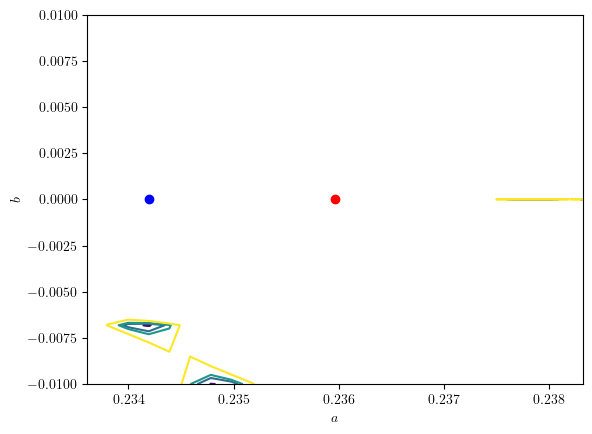

In [19]:
AVALS, BVALS = np.meshgrid(np.unique(a_list),np.unique(b_list))
CHI2 = np.reshape(chi2_list, (np.unique(a_list).shape[0],np.unique(b_list).shape[0])).transpose()

idx = np.argmin(chi2_list)
print(chi2_list[idx])
a_bf = a_list[idx]
b_bf = b_list[idx]

plt.contour(AVALS, BVALS, CHI2 - min(chi2_list), levels=[0.001, 0.1, 0.5, 4.16, 6.18, 11.83])
plt.plot(fluxes_dict["10TeV"]["SSW"], 0.0, marker="o", color="r")
plt.plot(a_bf, b_bf, marker="o", color="b")

#plt.xlim((0.236, 0.237))
plt.xlabel("$a$")
plt.ylabel(r"$b$")
plt.show()

(array([  7,  32,  57,  82, 107, 132, 157, 182, 207, 232, 257, 282, 307,
       332, 357, 382, 407, 432, 457, 482, 507, 532, 557, 582, 607]),)
0.23596273291925465
[301.8626188233615, 225.71908541239054, 161.46089808184587, 109.07796162148162, 68.56023727147539, 39.89774272097436, 23.080552108290647, 18.09879602087824, 24.942661496346204, 43.602392021154486, 74.06828753137997, 116.330704412586, 170.38005549963174, 236.20681007614976, 313.8014938761975, 403.154689083295, 504.25703432903913, 617.0992246960006, 741.6720117148383, 877.9662033657553, 1025.9726640808613, 1185.682314737864, 1357.0861326652973, 1540.1751516421057]


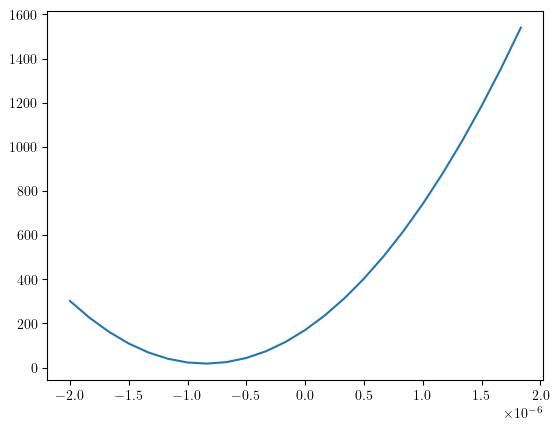

In [51]:
print(np.where(b_list == b_bf))
print(fluxes_dict["10TeV"]["SSW"])

chi2_slice = chi2_list[75:99]
b_slice = b_list[75:99]

print(chi2_slice)

plt.plot(b_slice, chi2_slice)

# WMA analysis from Multinest: $\sin^2(\theta_W) = a + (q-q_0) b$ Hypothesis

In [4]:
from scipy.interpolate import griddata

def plot_WMA_2param(mndat):

    # Begin plotting: Two quadrants
    fig, axes = plt.subplots(1, 1, figsize=(13, 6))

    a = mndat[:, 2]
    b = mndat[:, 3]
    deltaChi2 = mndat[:, 1]

    #axes[0].set_xlim((-0.505, -0.495))
    #axes[0].set_ylim((-0.03, -0.02))
    axes.set_ylabel(r"$b$", fontsize=16)
    axes.set_xlabel(r"$a$", fontsize=16)
    #axes.set_yscale('log')

    # Try with grid interp
    grid_x, grid_y = np.mgrid[min(a):max(a):100j, min(b):max(b):100j]
    grid_deltaChi2 = griddata((a, b), deltaChi2, (grid_x, grid_y), method='cubic')
    axes.contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61, 6.18, 11.83])
    axes.tick_params(axis="x", labelsize=16)
    axes.tick_params(axis="y", labelsize=16)

    # Set the grids
    axes.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')


    
    plt.show()
    plt.tight_layout()
    #fig.savefig(save_name)
    plt.close()


def plot_WMA_2param_scatter(mndat, xlim=(0.235, 0.237), ylim=(-1.5e-3,1.5e-3)):

    # Begin plotting: Two quadrants
    fig, axes = plt.subplots(1, 1, figsize=(8, 6))

    a = mndat[:, 2]
    b = 1e3*mndat[:, 3]
    deltaChi2 = mndat[:, 1]
    pvals = np.cumsum(mndat[:,0])

    a_90cl = a[pvals > 0.05]
    b_90cl = b[pvals > 0.05]
    a_68cl = a[pvals > 0.32]
    b_68cl = b[pvals > 0.32]
    a_99cl = a[pvals > 0.01]
    b_99cl = b[pvals > 0.01]

    axes.set_ylabel(r"$b$ [GeV$^{-1}$]", fontsize=16)
    axes.set_xlabel(r"$a$", fontsize=16)

    custom_xticks = [0.235, 0.2355, 0.236, 0.2365, 0.237, 0.2375]
    axes.set_xticks(custom_xticks)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    #plt.scatter(a, b, color='silver', alpha=0.5, marker=".")
    plt.scatter(a_99cl, b_99cl, color='silver', marker=".", alpha=1.0)
    plt.scatter(a_90cl, b_90cl, color='khaki', marker=".", alpha=1.0)
    plt.scatter(a_68cl, b_68cl, color='g', marker=".", alpha=1.0)

    # Set the grids
    axes.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')
    
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)

    plt.title(r"$\sin^2\theta_W(q) = a + b (q - q_0)$ Hypothesis, $\sqrt{s}=10$ TeV MC", loc="right", fontsize=16)

    plt.tight_layout()
    plt.show()
    #fig.savefig(save_name)
    plt.close()

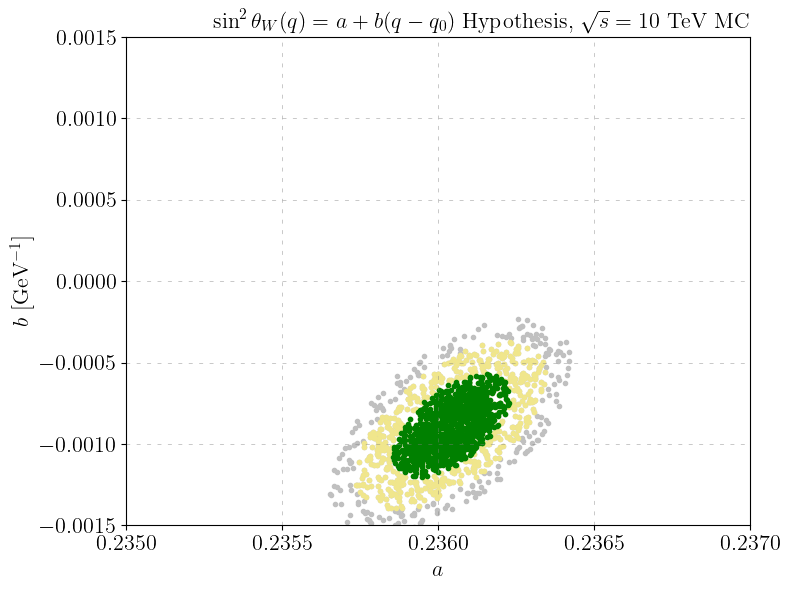

In [5]:
wma_mn_data = np.genfromtxt("multinest/Quest/WMA/10TeV_MC_SSW2param_v2_.txt")

#plot_WMA_2param(wma_mn_data)
plot_WMA_2param_scatter(wma_mn_data)

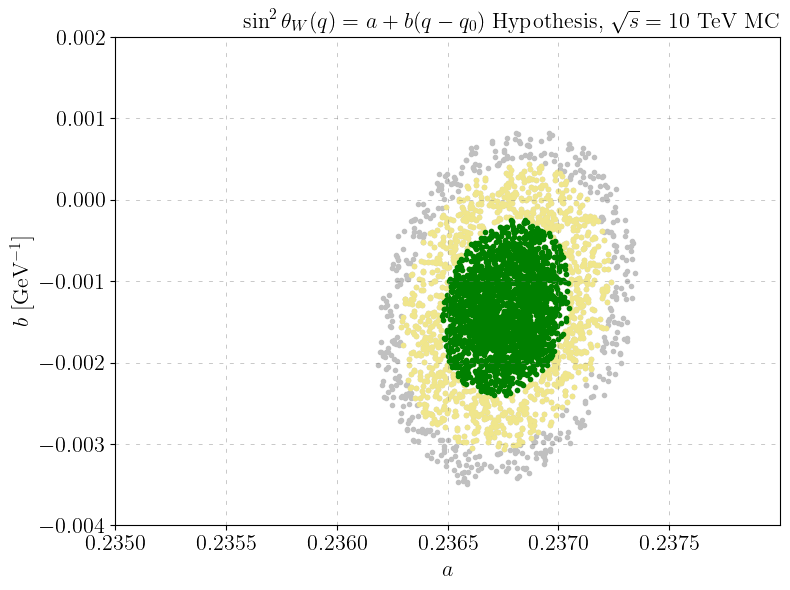

In [8]:
wma_mn_data_3TeV = np.genfromtxt("multinest/Quest/WMA/3TeV_MC_SSW2param_.txt")

#plot_WMA_2param(wma_mn_data)
plot_WMA_2param_scatter(wma_mn_data_3TeV, xlim=(0.235, 0.238), ylim=(-4e-3,2e-3))

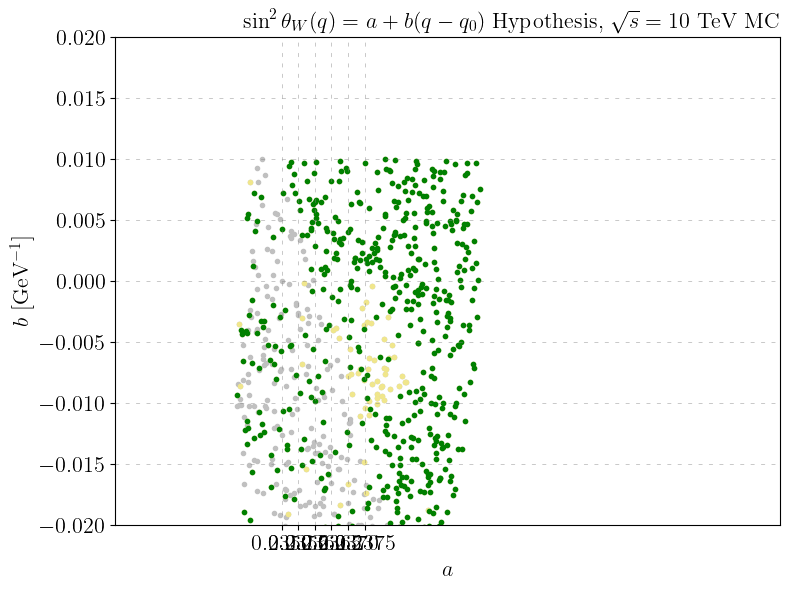

In [9]:
wma_mn_data_500GeV = np.genfromtxt("multinest/Quest/WMA/500GeV_MC_SSW2param_.txt")

#plot_WMA_2param(wma_mn_data)
plot_WMA_2param_scatter(wma_mn_data_500GeV, xlim=(0.23, 0.25), ylim=(-2e-2,2e-2))

In [12]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def plot_WMA_nfile(mndat_list, xlim=(0.235, 0.237), ylim=(-1.5e-3,1.5e-3), scatter=False, n_std=3.0, label_text=None, save_name=None):

    colors = ['mediumseagreen', 'goldenrod', 'lightsteelblue']

    # Begin plotting: Two quadrants
    fig, axes = plt.subplots(1, 1, figsize=(8, 6))

    alpha_el = 1.0
    zorder_el = 1
    for i, mndat in enumerate(mndat_list):
        if i == 2:
            alpha_el=0.4
            zorder_el = 0

        a = mndat[:, 2]
        b = 1e3*mndat[:, 3]
        pvals = np.cumsum(mndat[:,0])

        a_90cl = a[pvals > 0.05]
        b_90cl = b[pvals > 0.05]
        a_68cl = a[pvals > 0.32]
        b_68cl = b[pvals > 0.32]
        a_99cl = a[pvals > 0.01]
        b_99cl = b[pvals > 0.01]

        axes.set_ylabel(r"$b$ [GeV$^{-1}$]", fontsize=16)
        axes.set_xlabel(r"$a$", fontsize=16)

        custom_xticks = np.arange(xlim[0], xlim[-1]+0.0005, 0.0005)
        axes.set_xticks(custom_xticks)

        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        
        # Calculate a, b variance and mean
        a_68_mean = np.mean(a_68cl)
        b_68_mean = np.mean(b_68cl)
        if label_text is not None:
            if i == 2:
                plt.text(a_68_mean-0.0002, 0.001, label_text[i], zorder=9)
            else:
                plt.text(a_68_mean-0.0002, b_68_mean, label_text[i], zorder=9)

        confidence_ellipse(a_68cl, b_68cl, axes, n_std=n_std, edgecolor=colors[i], facecolor=colors[i], alpha=alpha_el, zorder=zorder_el)
        confidence_ellipse(a_90cl, b_90cl, axes, n_std=1.1*n_std, edgecolor=colors[i], ls='dashed')
        confidence_ellipse(a_99cl, b_99cl, axes, n_std=1.2*n_std, edgecolor=colors[i], ls='dotted')

        if scatter:
            plt.scatter(a_99cl, b_99cl, color='silver', marker=".", alpha=0.5)
            plt.scatter(a_90cl, b_90cl, color='khaki', marker=".", alpha=0.5)
            plt.scatter(a_68cl, b_68cl, color='mediumseagreen', marker=".", alpha=0.2)


    # Set the grids
    axes.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')
    
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)

    plt.hlines(y=0.0, xmin=xlim[0], xmax=xlim[-1], color='k', linewidth=1.0)
    #plt.text(0.2356, 0.00015, "No Running", fontsize=14)

    plt.title(r"$\sin^2\theta_W(q) = a + b (q - q_0)$ Hypothesis", loc="right", fontsize=16)

    plt.tight_layout()
    
    if save_name is not None:
        fig.savefig(save_name)

    plt.show()
    plt.close()

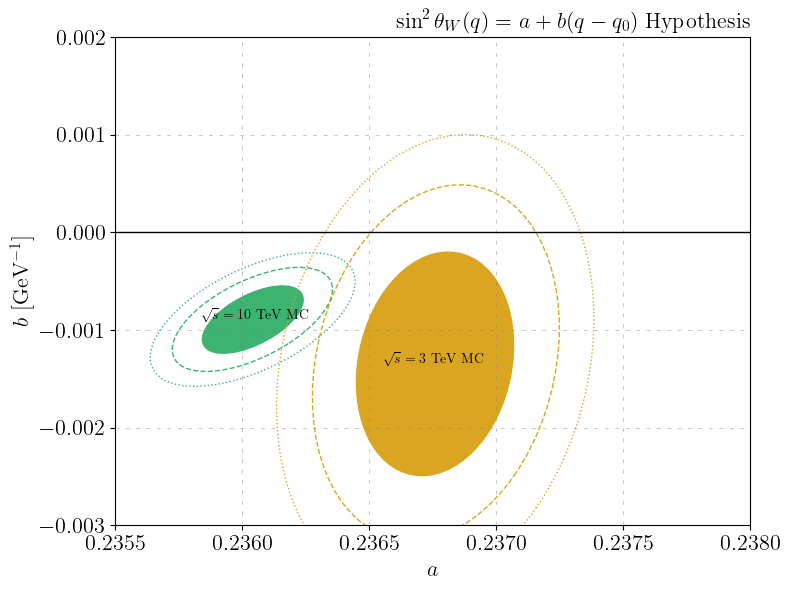

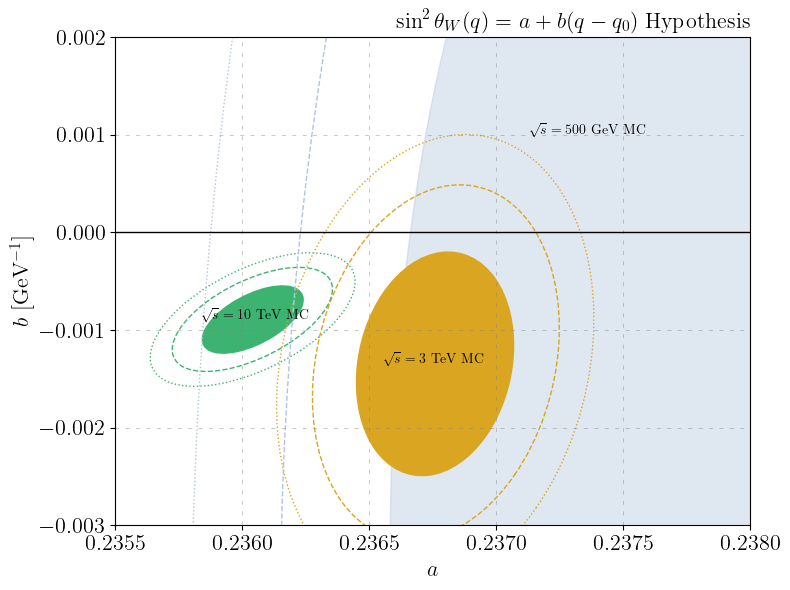

In [13]:
wma_mn_data = np.genfromtxt("multinest/Quest/WMA/10TeV_MC_SSW2param_v2_.txt")
wma_mn_data_3TeV = np.genfromtxt("multinest/Quest/WMA/3TeV_MC_SSW2param_.txt")
wma_mn_data_500GeV = np.genfromtxt("multinest/Quest/WMA/500GeV_MC_SSW2param_.txt")

plot_WMA_nfile([wma_mn_data, wma_mn_data_3TeV], xlim=(0.2355, 0.238), ylim=(-0.003, 0.002),
               n_std=2.4, label_text=[r"$\sqrt{s} = 10$ TeV MC", r"$\sqrt{s} = 3$ TeV MC"],
               scatter=False, save_name="plots/weak_mixing/wma_a_vs_b.pdf")

plot_WMA_nfile([wma_mn_data, wma_mn_data_3TeV, wma_mn_data_500GeV], xlim=(0.2355, 0.238), ylim=(-0.003, 0.002),
               n_std=2.4, label_text=[r"$\sqrt{s} = 10$ TeV MC", r"$\sqrt{s} = 3$ TeV MC", r"$\sqrt{s} = 500$ GeV MC"],
               scatter=False, save_name="plots/weak_mixing/wma_a_vs_b_3benchmark.pdf")

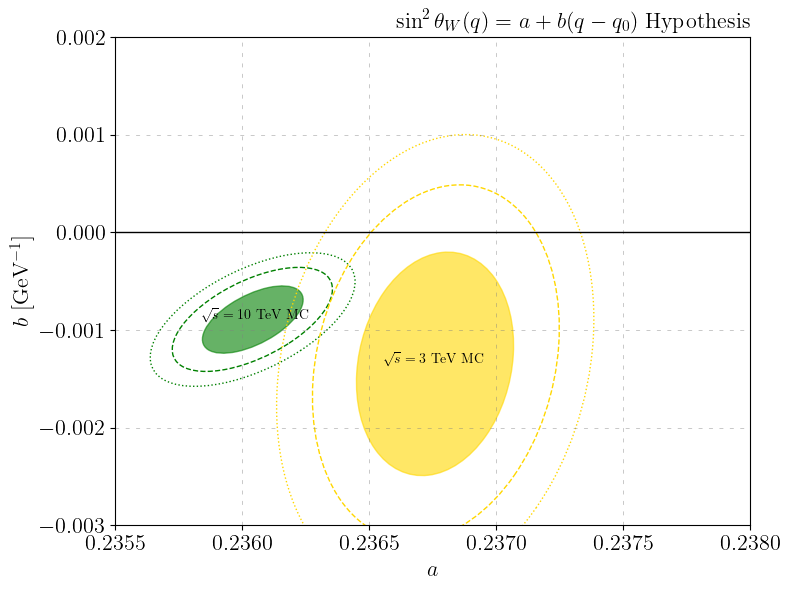

In [25]:
plot_WMA_nfile([wma_mn_data, wma_mn_data_3TeV], xlim=(0.2355, 0.238), ylim=(-0.003, 0.002),
               n_std=2.4, label_text=[r"$\sqrt{s} = 10$ TeV MC", r"$\sqrt{s} = 3$ TeV MC"],
               scatter=False, save_name="plots/weak_mixing/wma_a_vs_b.pdf")